- plot shap_values for 
 - models #16 and #17
 - 5 samples and 50 samples
 - public and private data
- plot attr_all_22085_genes
 - models #16 and #17
 - use same samples as above
 - public and private data
- get_plot_per_cell_type() plots attributions coloured by cell type

In [2]:
%%capture output
!pip install shap
!pip install anndata
!pip install ipywidgets
!pip install --upgrade jupyter
!pip install IProgress

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import shap

import anndata as ad
import scipy
import scanpy as sc

from helper_functions import *

In [2]:
plt.rcParams['figure.dpi'] = 100
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', facecolor=None)
sc.logging.print_header()

scanpy==1.9.5 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.2 scikit-learn==1.2.2 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.8


In [3]:
lrz_path = '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93zoj/'
index_path = lrz_path + 'open-problems-multimodal-3rd-solution/input/preprocess/cite/'

In [4]:
# all_22001_genes: 22001 features, handselected_gene_ids: 84 handselected genes
all_22001_genes = np.loadtxt('2.preprocess_to_feature/cite/all_22001_genes_names.txt', dtype=str)
handselected_gene_ids = np.loadtxt('2.preprocess_to_feature/cite/handselected_84_gene_ids.txt', dtype=str)

In [5]:
# all 22085 genes sorted totally alphabetically
train_column = np.load(index_path + "train_cite_raw_inputs_idxcol.npz", allow_pickle=True)["columns"]
train_column

array(['ENSG00000121410_A1BG', 'ENSG00000268895_A1BG-AS1',
       'ENSG00000175899_A2M', ..., 'ENSG00000162378_ZYG11B',
       'ENSG00000159840_ZYX', 'ENSG00000074755_ZZEF1'], dtype=object)

### plots for public data: ignore, use private data

#### plots for model #16

In [17]:
# shap_values = np.load('4.model/pred/shap_values_16_50_samples_restructured.npy', allow_pickle=True).astype(float)
# xtest = ad.read_h5ad('4.model/pred/X_test_shap_16_50_samples.h5ad')
# xtest

In [18]:
# shap_beeswarm(shap_values, xtest)   # plots only svd components
# goal: get this plot as SHAP / features instead of SHAP / SVD components + features

In [19]:
# shap_bar_plot(shap_values, xtest)   # only svd components

#### shap plot with backpropagated gene attributions

In [20]:
# test_inputs = scipy.sparse.load_npz(index_path + "test_cite_raw_inputs_values.sparse.npz")
# test_inputs = pd.DataFrame(test_inputs.toarray(), columns=train_column)   # should be correct order (totally ordered)

# # get cell ids
# test_ids = np.load(index_path + "test_cite_raw_inputs_idxcol.npz", allow_pickle=True)
# test_index = test_ids["index"]
# len(test_index)

# test_inputs.index = test_index

# test_inputs.head(2)

In [21]:
# cell ids used in xtest and SHAP:
# sample_cells = xtest.obs_names
# sample_cells

In [22]:
# create xtest_all_genes: for shap plot, containing all 22085 genes instead of svd components
# xtest_all_genes = test_inputs.loc[sample_cells]
# print(xtest_all_genes.shape)
# xtest_all_genes.head(2)

In [23]:
# attr_all_22085_genes = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_16_50_samples_med.pkl')
# attr_all_22085_genes[0].head(2)

In [24]:
# attr_beeswarm(attr_all_22085_genes, xtest_all_genes, 0)  # public data -> consider private instead, see below

In [25]:
# get top 20 features (see shap beeswarm plot)
# top_20 = get_top_features(attr_all_22085_genes[0], ad.AnnData(xtest_all_genes), 20)
# print(top_20)
# np.save('4.model/pred/top_feature_names_16.npy', top_20)

#### plot shap values per cell type similar to shap.summary_plot(shap_values[0], xtest)

In [26]:
# consider private data below instead
# get_plot_per_cell_type(attr_all_22085_genes, ad.AnnData(X=xtest_all_genes, obs=xtest.obs), save=True, filename='attr_16_50_samples', all_attr=True)

#### plots for model #17

In [27]:
# shap_values = np.load('shap_values_16_50_samples.npy', allow_pickle=True).astype(float)
# shap_values = np.load('4.model/pred/shap_values_16_restructured.npy', allow_pickle=True).astype(float)
# shap_values = np.load('4.model/pred/shap_values_17_50_samples_restructured.npy', allow_pickle=True).astype(float)
# xtest = ad.read_h5ad('4.model/pred/X_test_shap_17_50_samples.h5ad')
# xtest

In [28]:
# shap_beeswarm(shap_values, xtest)   # only svd components
# goal: get this plot as SHAP / features instead of SHAP / SVD components + features

#### shap plot with backpropagated gene attributions

In [29]:
# attr_all_22085_genes = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_17_50_samples.pkl')
# attr_all_22085_genes[0].head(2)

In [30]:
# attr_beeswarm(attr_all_22085_genes, xtest_all_genes, 0)   # consider private data below instead

In [31]:
# get top 20 features (see shap beeswarm plot)
# top_20 = get_top_features(attr_all_22085_genes[0], ad.AnnData(xtest_all_genes), 20)
# print(top_20)
# np.save('4.model/pred/top_feature_names_17.npy', top_20)

In [32]:
# consider private data below instead
# get_plot_per_cell_type(attr_all_22085_genes, ad.AnnData(X=xtest_all_genes, obs=xtest.obs), save=True, filename='attr_17_50_samples', all_attr=True)

## plots for private data

### plots for model #16

In [6]:
# shap_values = np.load('4.model/pred/shap_values_16_50_samples_p.npy', allow_pickle=True).astype(float)
shap_values = np.load('4.model/pred/shap_values_16_50_samples_p_ct_distr.npy', allow_pickle=True).astype(float)
xtest = ad.read_h5ad('4.model/pred/private_test_input_128_svd_50_samples.h5ad')
xtest

AnnData object with n_obs × n_vars = 350 × 212
    obs: 'kaggle_dataset', 'day', 'donor', 'cell_type'

In [11]:
# shap_beeswarm(shap_values, xtest)   # only svd components
# goal: get this plot as SHAP / features instead of SHAP / SVD components + features

#### shap plot with backpropagated gene attributions

In [7]:
# load private test input data (before svd)
# private_test_input instead? -> same plots, just higher feature values -> more red
private_test_input_raw = pd.read_pickle('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93zoj/kaggle/full_data/20220830_citeseq_rna_count_test_input_private_raw.pkl')
# private_test_input_raw.head()

In [8]:
# same cell ids used in xtest and SHAP:
sample_cells = np.array(xtest.obs_names)
# sample_cells[:5]

In [9]:
# create xtest_all_genes: for shap plot, containing all 22085 genes instead of svd components
# same for model 16 and 17 -> also input to ensemble shap plot
xtest_all_genes = private_test_input_raw.loc[sample_cells]
print(xtest_all_genes.shape)
# xtest_all_genes.head()

(350, 22085)


In [19]:
xtest_all_genes

gene_ids                         ENSG00000121410_A1BG  \
CTCCCTCGTATGAAAC-1-('32606', 7)                   0.0   
CATGCAATCGAAATCC-1-('27678', 7)                   0.0   
AAGCGAGGTTCATCGA-1-('31800', 7)                   0.0   
TTCGCTGAGAAAGTCT-1-('27678', 7)                   0.0   
TCCAGAACATCTCATT-1-('31800', 7)                   0.0   
...                                               ...   
CAGAGCCGTACCGGAA-1-('32606', 7)                   0.0   
TTGGGTAGTTACCTTT-1-('31800', 7)                   1.0   
AGACAGGCATGCTGCG-1-('13176', 7)                   0.0   
CGAGGAATCGCGAAGA-1-('32606', 7)                   1.0   
TTCCTCTTCATGGAGG-1-('32606', 7)                   0.0   

gene_ids                         ENSG00000268895_A1BG-AS1  \
CTCCCTCGTATGAAAC-1-('32606', 7)                       1.0   
CATGCAATCGAAATCC-1-('27678', 7)                       0.0   
AAGCGAGGTTCATCGA-1-('31800', 7)                       0.0   
TTCGCTGAGAAAGTCT-1-('27678', 7)                       0.0   
TCCAGAACATCTCATT-1-('31800', 7)                       0.0   
...                                                   ...   
CAGAGCCGTACCGGAA-1-('32606', 7)                       0.0   
TTGGGTAGTTACCTTT-1-('31800', 7)                       0.0   
AGACAGGCATGCTGCG-1-('13176', 7)                       0.0   
CGAGGAATCGCGAAGA-1-('32606', 7)                       0.0   
TTCCTCTTCATGGAGG-1-('32606', 7)                       0.0   

gene_ids                         ENSG00000175899_A2M  ENSG00000245105_A2M-AS1  \
CTCCCTCGTATGAAAC-1-('32606', 7)                  0.0                      0.0   
CATGCAATCGAAATCC-1-('27678', 7)                  0.0                      0.0   
AAGCGAGGTTCATCGA-1-('31800', 7)                  0.0                      0.0   
TTCGCTGAGAAAGTCT-1-('27678', 7)                  0.0                      0.0   
TCCAGAACATCTCATT-1-('31800', 7)                  0.0                      0.0   
...                                              ...                      ...   
CAGAGCCGTACCGGAA-1-('32606', 7)                  0.0                      0.0   
TTGGGTAGTTACCTTT-1-('31800', 7)                  0.0                      0.0   
AGACAGGCATGCTGCG-1-('13176', 7)                  0.0                      0.0   
CGAGGAATCGCGAAGA-1-('32606', 7)                  0.0                      0.0   
TTCCTCTTCATGGAGG-1-('32606', 7)                  0.0                      0.0   

gene_ids                         ENSG00000166535_A2ML1  \
CTCCCTCGTATGAAAC-1-('32606', 7)                    0.0   
CATGCAATCGAAATCC-1-('27678', 7)                    0.0   
AAGCGAGGTTCATCGA-1-('31800', 7)                    0.0   
TTCGCTGAGAAAGTCT-1-('27678', 7)                    0.0   
TCCAGAACATCTCATT-1-('31800', 7)                    0.0   
...                                                ...   
CAGAGCCGTACCGGAA-1-('32606', 7)                    0.0   
TTGGGTAGTTACCTTT-1-('31800', 7)                    0.0   
AGACAGGCATGCTGCG-1-('13176', 7)                    0.0   
CGAGGAATCGCGAAGA-1-('32606', 7)                    0.0   
TTCCTCTTCATGGAGG-1-('32606', 7)                    0.0   

gene_ids                         ENSG00000128274_A4GALT  ENSG00000094914_AAAS  \
CTCCCTCGTATGAAAC-1-('32606', 7)                     0.0                   0.0   
CATGCAATCGAAATCC-1-('27678', 7)                     0.0                   0.0   
AAGCGAGGTTCATCGA-1-('31800', 7)                     0.0                   1.0   
TTCGCTGAGAAAGTCT-1-('27678', 7)                     0.0                   1.0   
TCCAGAACATCTCATT-1-('31800', 7)                     0.0                   0.0   
...                                                 ...                   ...   
CAGAGCCGTACCGGAA-1-('32606', 7)                     0.0                   0.0   
TTGGGTAGTTACCTTT-1-('31800', 7)                     0.0                   2.0   
AGACAGGCATGCTGCG-1-('13176', 7)                     0.0                   0.0   
CGAGGAATCGCGAAGA-1-('32606', 7)                     0.0                   1.0   
TTCCTCTTCATGGAGG-1-('

In [12]:
attr_all_22085_genes = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_16_50_samples_p_ct_distr.pkl')
attr_all_22085_genes[0].shape

(350, 22085)

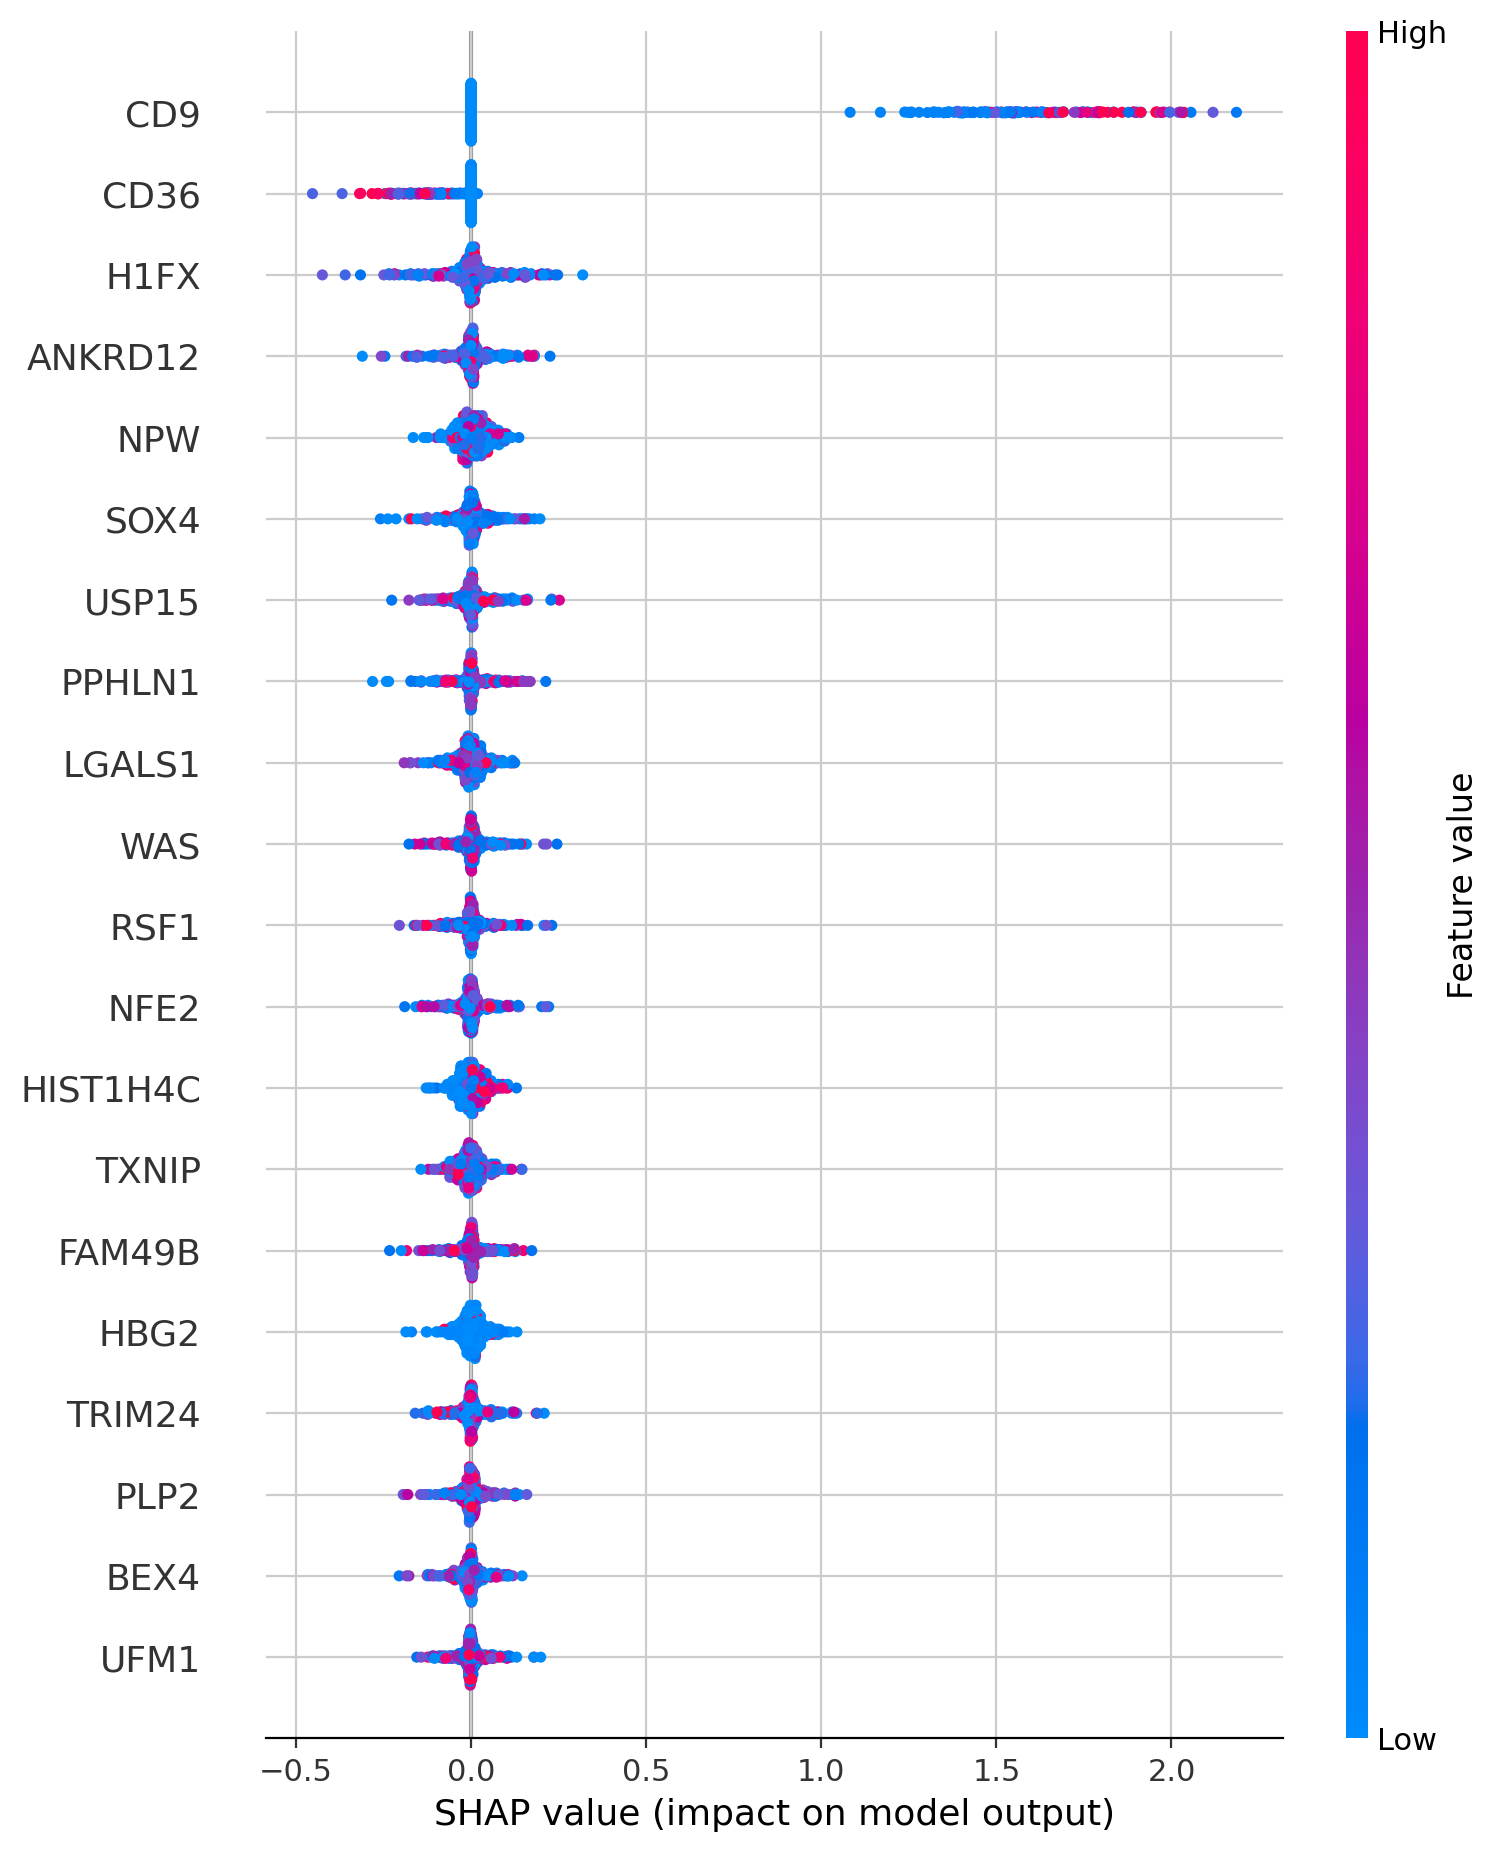

In [13]:
 attr_beeswarm(attr_all_22085_genes, xtest_all_genes, get_protein_idx('CD9'))

X converted to numpy array with dtype float64
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


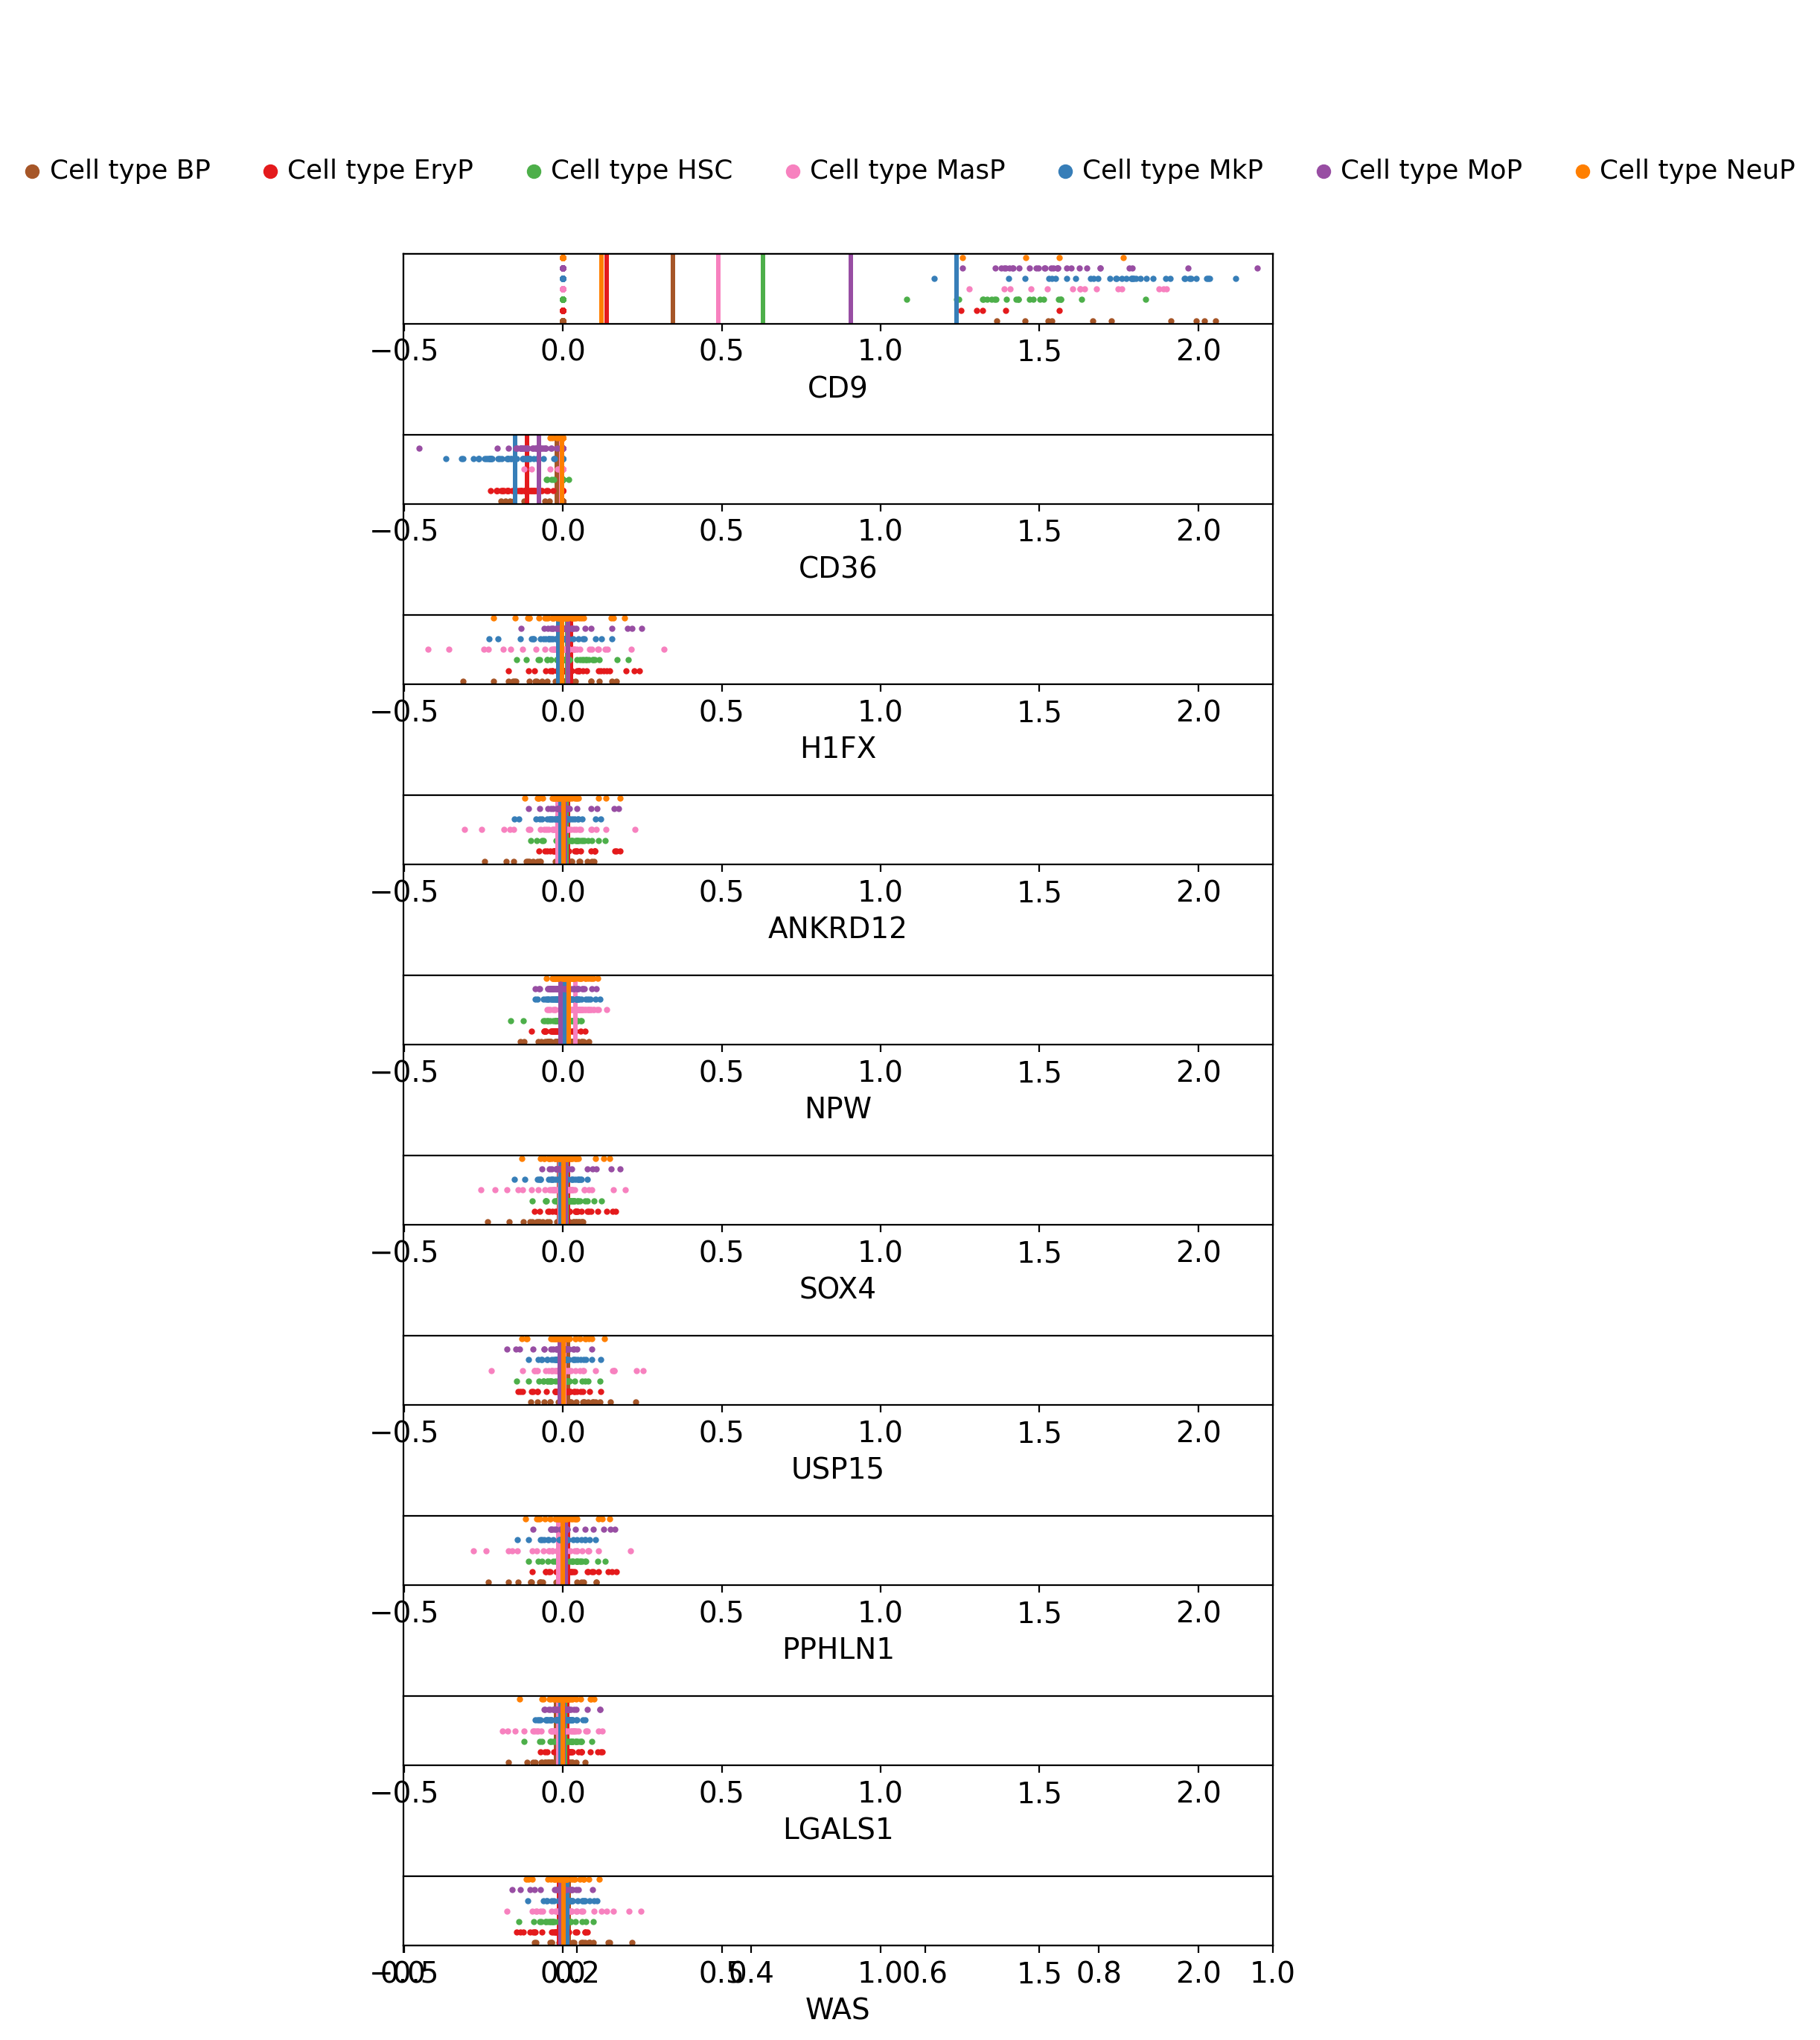

In [15]:
get_plot_per_cell_type(attr_all_22085_genes, ad.AnnData(X=xtest_all_genes, obs=xtest.obs, dtype=xtest_all_genes.dtypes), get_protein_idx('CD9'), all_attr=True)  #, save=True, filename='attr_16_50_samples_p', all_attr=True)

X converted to numpy array with dtype float64
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


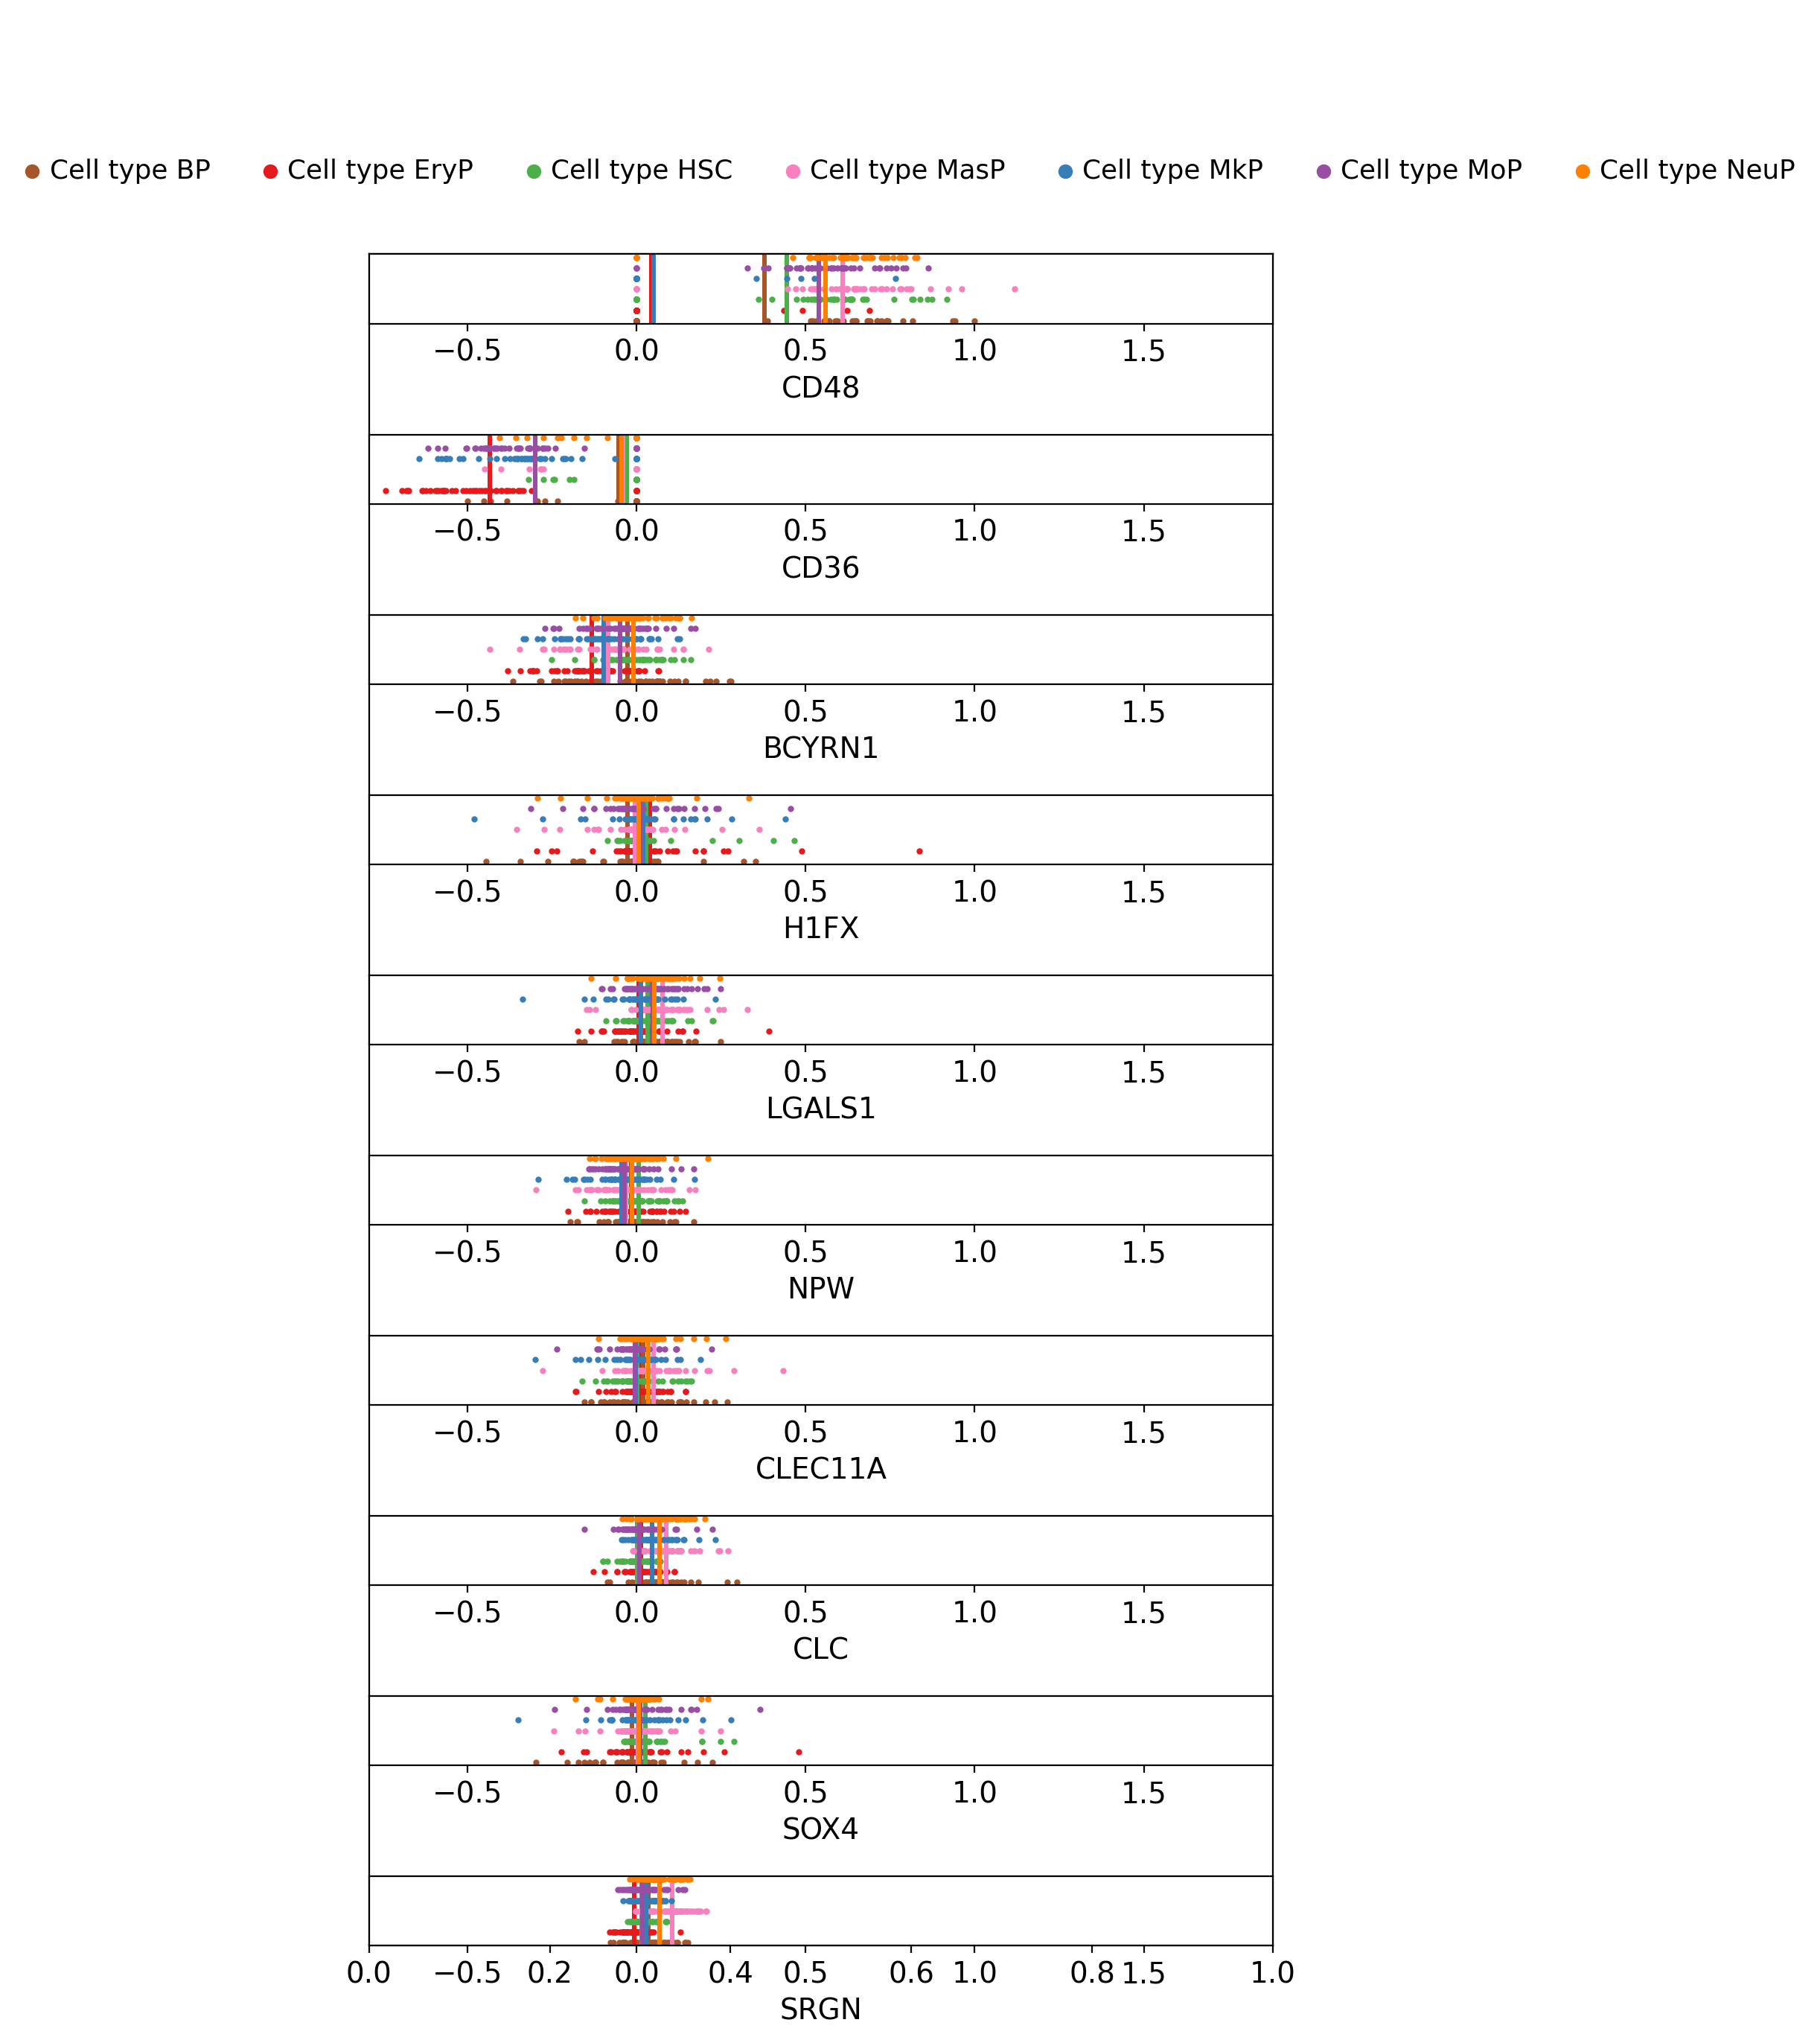

In [33]:
get_plot_per_cell_type(attr_all_22085_genes, ad.AnnData(X=xtest_all_genes, obs=xtest.obs, dtype=xtest_all_genes.dtypes), get_protein_idx('CD48'), all_attr=True)  #, save=True, filename='attr_16_50_samples_p', all_attr=True)

In [18]:
# get top 20 features (see shap beeswarm plot)
# top_20 = get_top_features(attr_all_22085_genes[0], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 20)
# print(top_20)
# np.save('4.model/pred/top_feature_names_16_p.npy', top_20)

#### check why some genes ranked low

X converted to numpy array with dtype float64


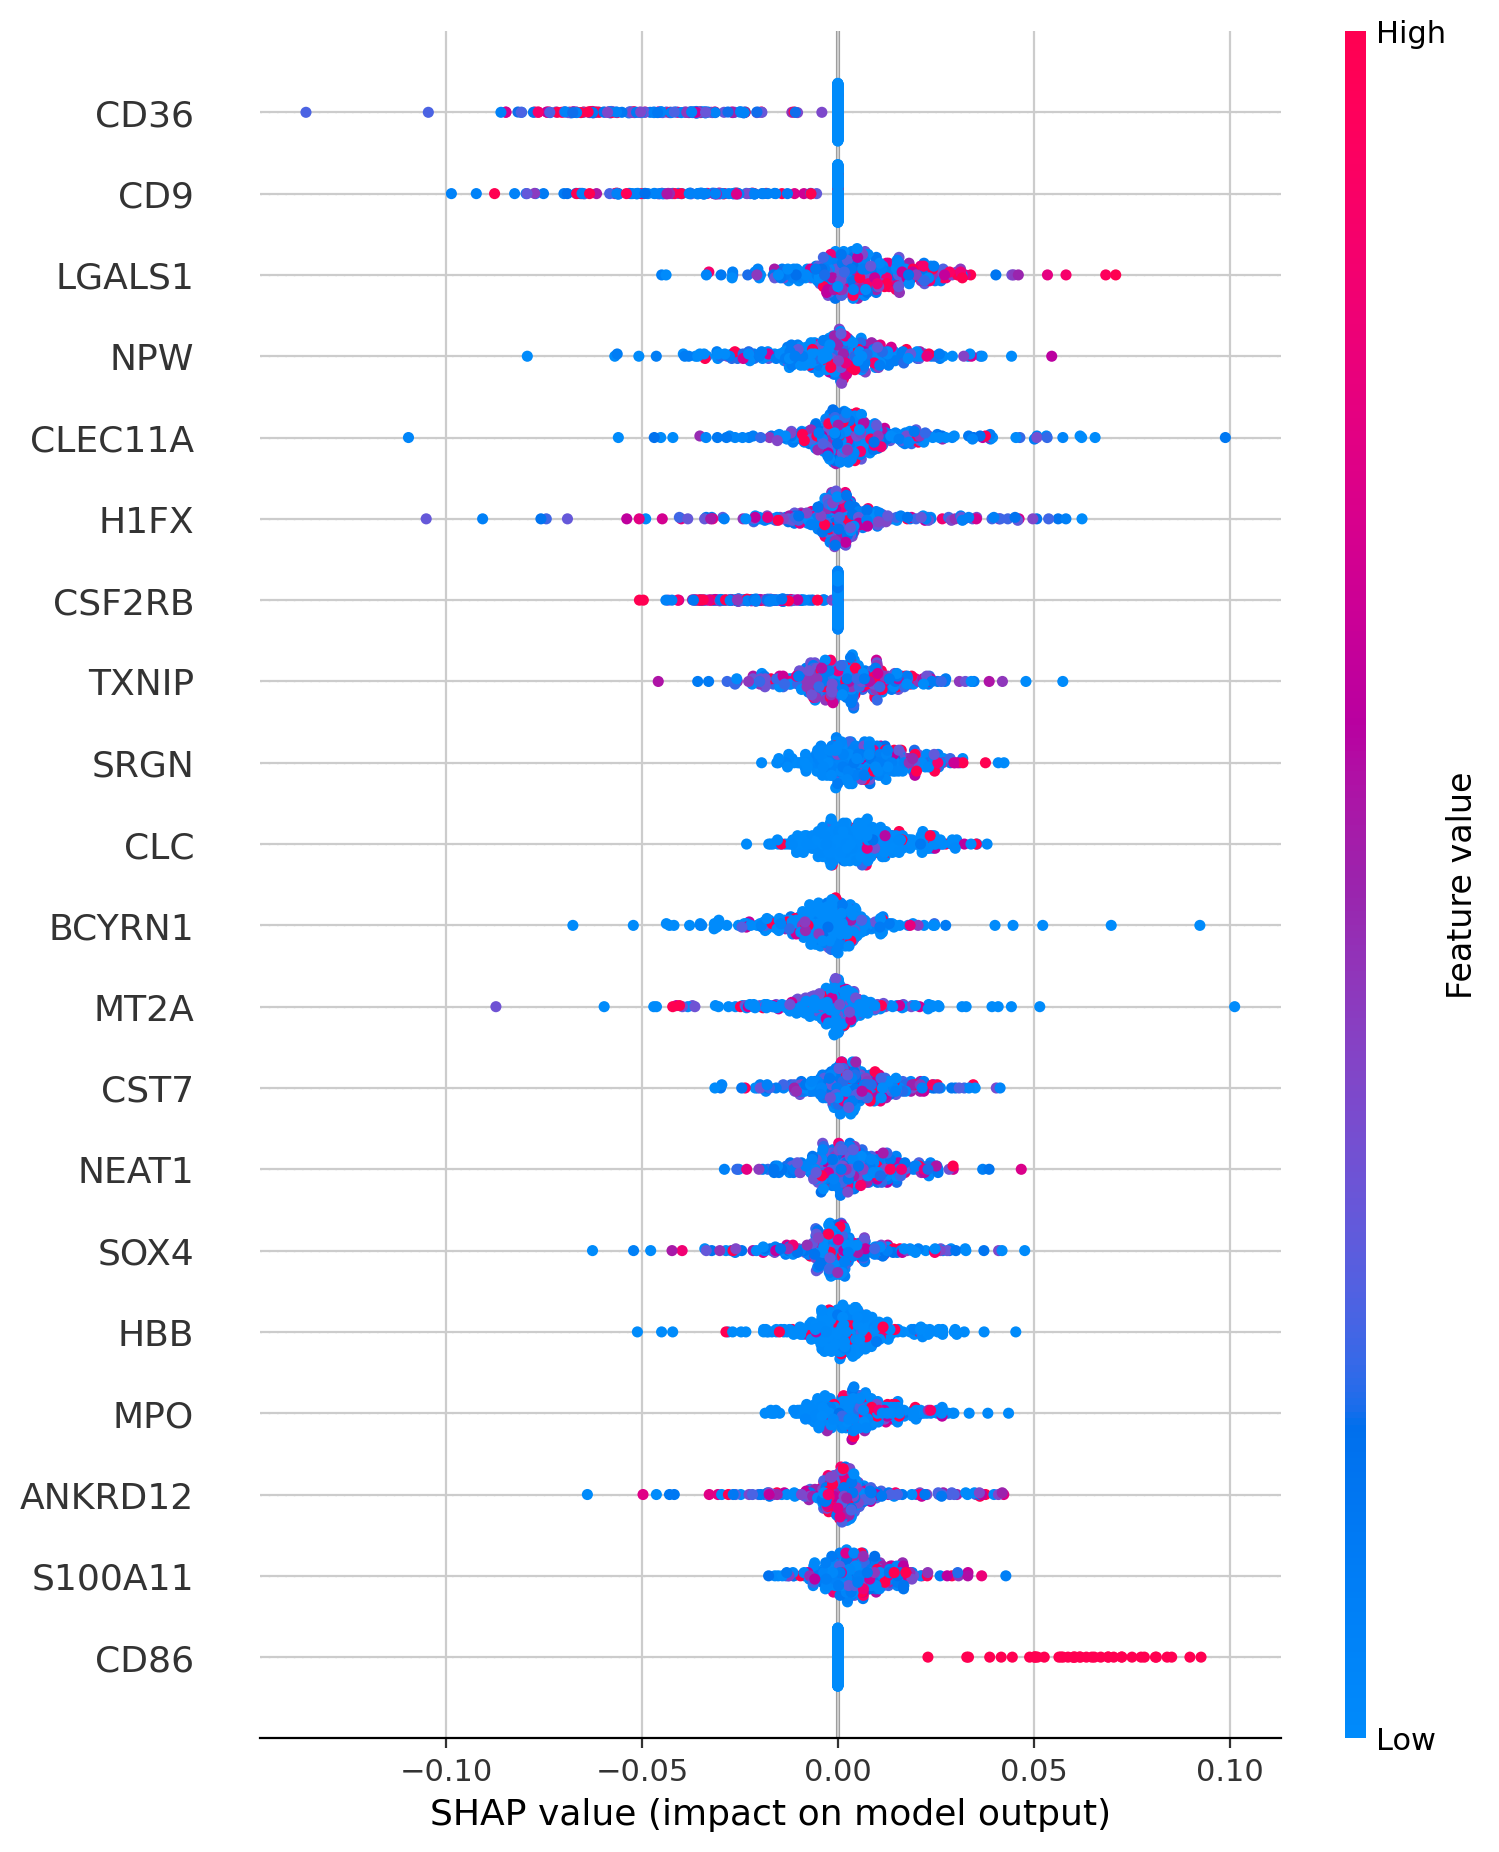

In [35]:
# subset attr_all_22085_genes: any 19 plus the column we want
# force plot to show specific column
# see why 86 ranked low
idx = get_protein_idx('CD86')
top_19 = get_top_features(attr_all_22085_genes[idx], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 19)
corresp_gene = [col for col in attr_all_22085_genes[idx].columns if col.endswith('CD86')]
subset = attr_all_22085_genes[idx][list(top_19)+corresp_gene]
shap.initjs()
shap.summary_plot(np.array(subset), xtest_all_genes[subset.columns], feature_names=[gene.split('_')[1] for gene in subset.columns])

X converted to numpy array with dtype float64


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


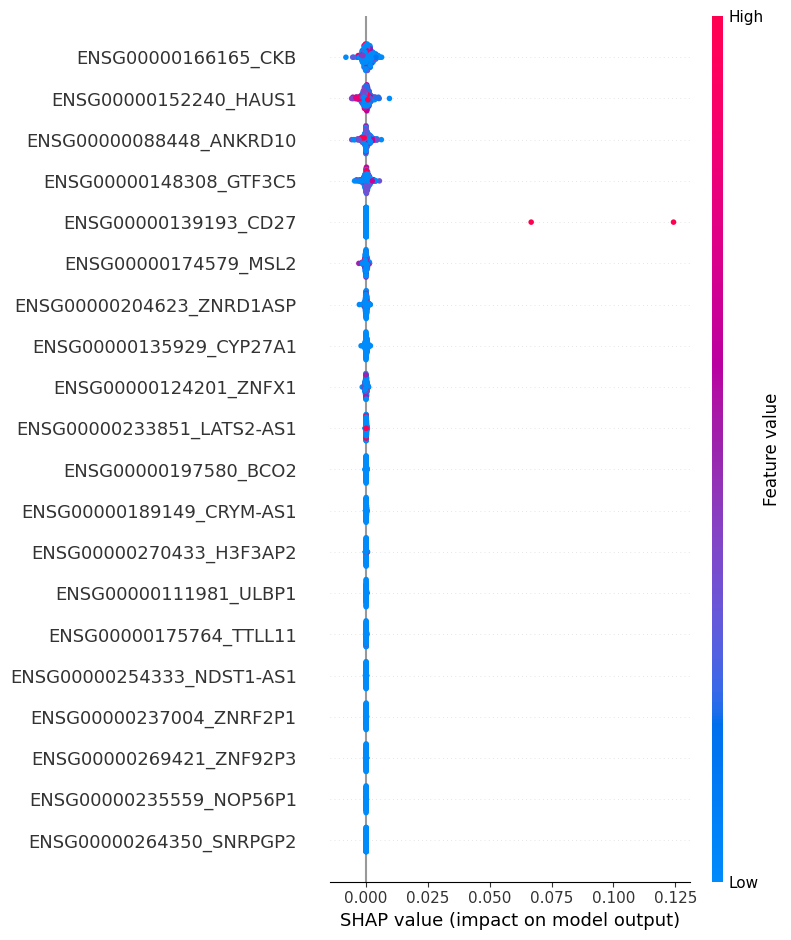

In [48]:
# see why 27 ranked low
idx = get_protein_idx('CD27')
top_19 = get_top_features(attr_all_22085_genes[idx], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 19)
corresp_gene = [col for col in attr_all_22085_genes[idx].columns if col.endswith('CD27')]
subset = attr_all_22085_genes[idx][list(top_19)+corresp_gene]
shap.initjs()
shap.summary_plot(np.array(subset), xtest_all_genes[subset.columns], feature_names=subset.columns)

In [49]:
top_19 = get_top_features(attr_all_22085_genes[get_protein_idx('CD9')], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 19)
top_19

X converted to numpy array with dtype float64


Index(['ENSG00000237004_ZNRF2P1', 'ENSG00000269421_ZNF92P3',
       'ENSG00000148308_GTF3C5', 'ENSG00000088448_ANKRD10',
       'ENSG00000235559_NOP56P1', 'ENSG00000264350_SNRPGP2',
       'ENSG00000111981_ULBP1', 'ENSG00000228049_POLR2J2',
       'ENSG00000233851_LATS2-AS1', 'ENSG00000167397_VKORC1',
       'ENSG00000117676_RPS6KA1', 'ENSG00000123119_NECAB1',
       'ENSG00000149929_HIRIP3', 'ENSG00000175764_TTLL11',
       'ENSG00000047346_FAM214A', 'ENSG00000049239_H6PD',
       'ENSG00000127191_TRAF2', 'ENSG00000101333_PLCB4',
       'ENSG00000167995_BEST1'],
      dtype='object', name='gene_ids')

In [ ]:
# force plotting top features of model 16 using attributions for model 17 (after running attr_..._17)
idx = get_protein_idx('CD9')
top_19 = get_top_features(attr_all_22085_genes[idx], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 19)
subset = attr_all_22085_genes_17[idx][list(top_19)]
shap.initjs()
shap.summary_plot(np.array(subset), xtest_all_genes[subset.columns], feature_names=subset.columns)

### plots for model #17

In [23]:
# shap_values = np.load('4.model/pred/shap_values_17_50_samples_p.npy', allow_pickle=True).astype(float)
xtest_17 = ad.read_h5ad('4.model/pred/private_test_input_64_svd_50_samples.h5ad')
# xtest_17

In [ ]:
# shap_beeswarm(shap_values, xtest)   # only svd components
# goal: get this plot as SHAP / features instead of SHAP / SVD components + features

#### shap plot with backpropagated gene attributions

In [24]:
attr_all_22085_genes_17 = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_17_50_samples_p_ct_distr.pkl')
attr_all_22085_genes_17[0].head(2)

ENSG00000121410_A1BG  ENSG00000268895_A1BG-AS1  ENSG00000175899_A2M  \
0              0.000136                  0.000431             0.000498   
1             -0.000138                  0.000377             0.001151   

   ENSG00000245105_A2M-AS1  ENSG00000166535_A2ML1  ENSG00000128274_A4GALT  \
0                 0.000939               0.000007               -0.000766   
1                 0.001888               0.000066               -0.002372   

   ENSG00000094914_AAAS  ENSG00000081760_AACS  ENSG00000109576_AADAT  \
0             -0.003348             -0.000048               -0.00022   
1              0.006538              0.001002                0.00110   

   ENSG00000103591_AAGAB  ...  ENSG00000188404_SELL  ENSG00000124570_SERPINB6  \
0              -0.000737  ...             -0.006766                 -0.020778   
1               0.002942  ...              0.000000                 -0.014653   

   ENSG00000235169_SMIM1  ENSG00000095932_SMIM24  ENSG00000137642_SORL1  \
0                    0.0                0.000000               0.000000   
1                    0.0                0.011124              -0.026157   

   ENSG00000128040_SPINK2  ENSG00000072274_TFRC  ENSG00000205542_TMSB4X  \
0                0.000000             -0.011902                0.000000   
1                0.012642             -0.013345               -0.009018   

   ENSG00000133112_TPT1  ENSG00000026025_VIM  
0             -0.024068                  0.0  
1              0.000000                  0.0  

[2 rows x 22085 columns]

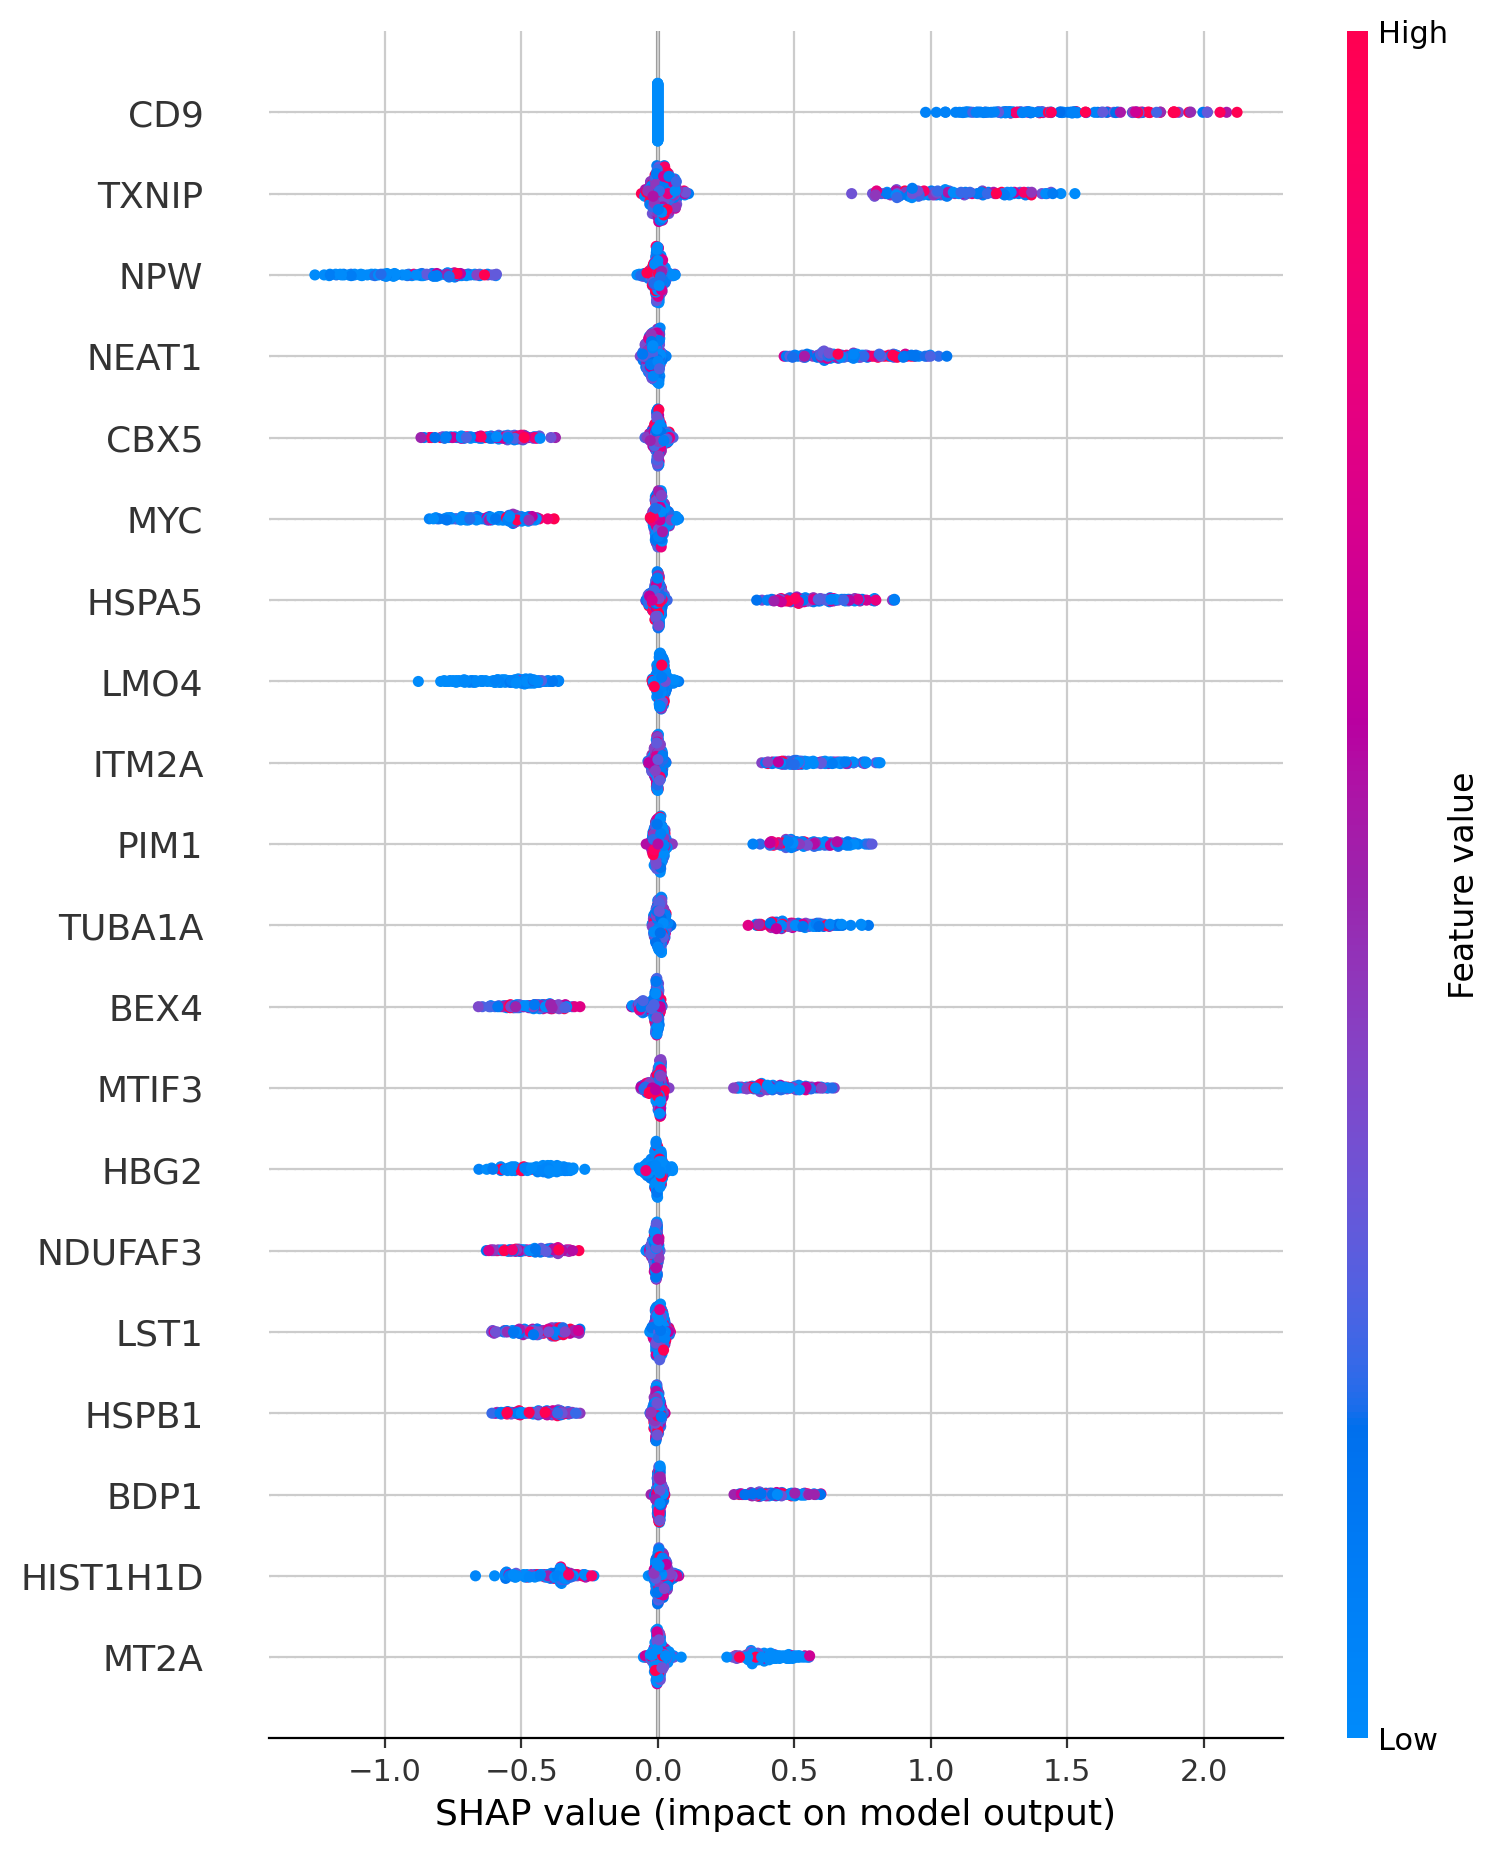

In [25]:
attr_beeswarm(attr_all_22085_genes_17, xtest_all_genes, get_protein_idx('CD9'))
# 121: maybe: model 17 checks if CD9 important at all (binary), model 16 gives actual value

In [ ]:
# get top 20 features (see shap beeswarm plot)
# top_20 = get_top_features(attr_all_22085_genes_17[0], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 20) 
# print(top_20)
# np.save('4.model/pred/top_feature_names_17_p.npy', top_20)

X converted to numpy array with dtype float64
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


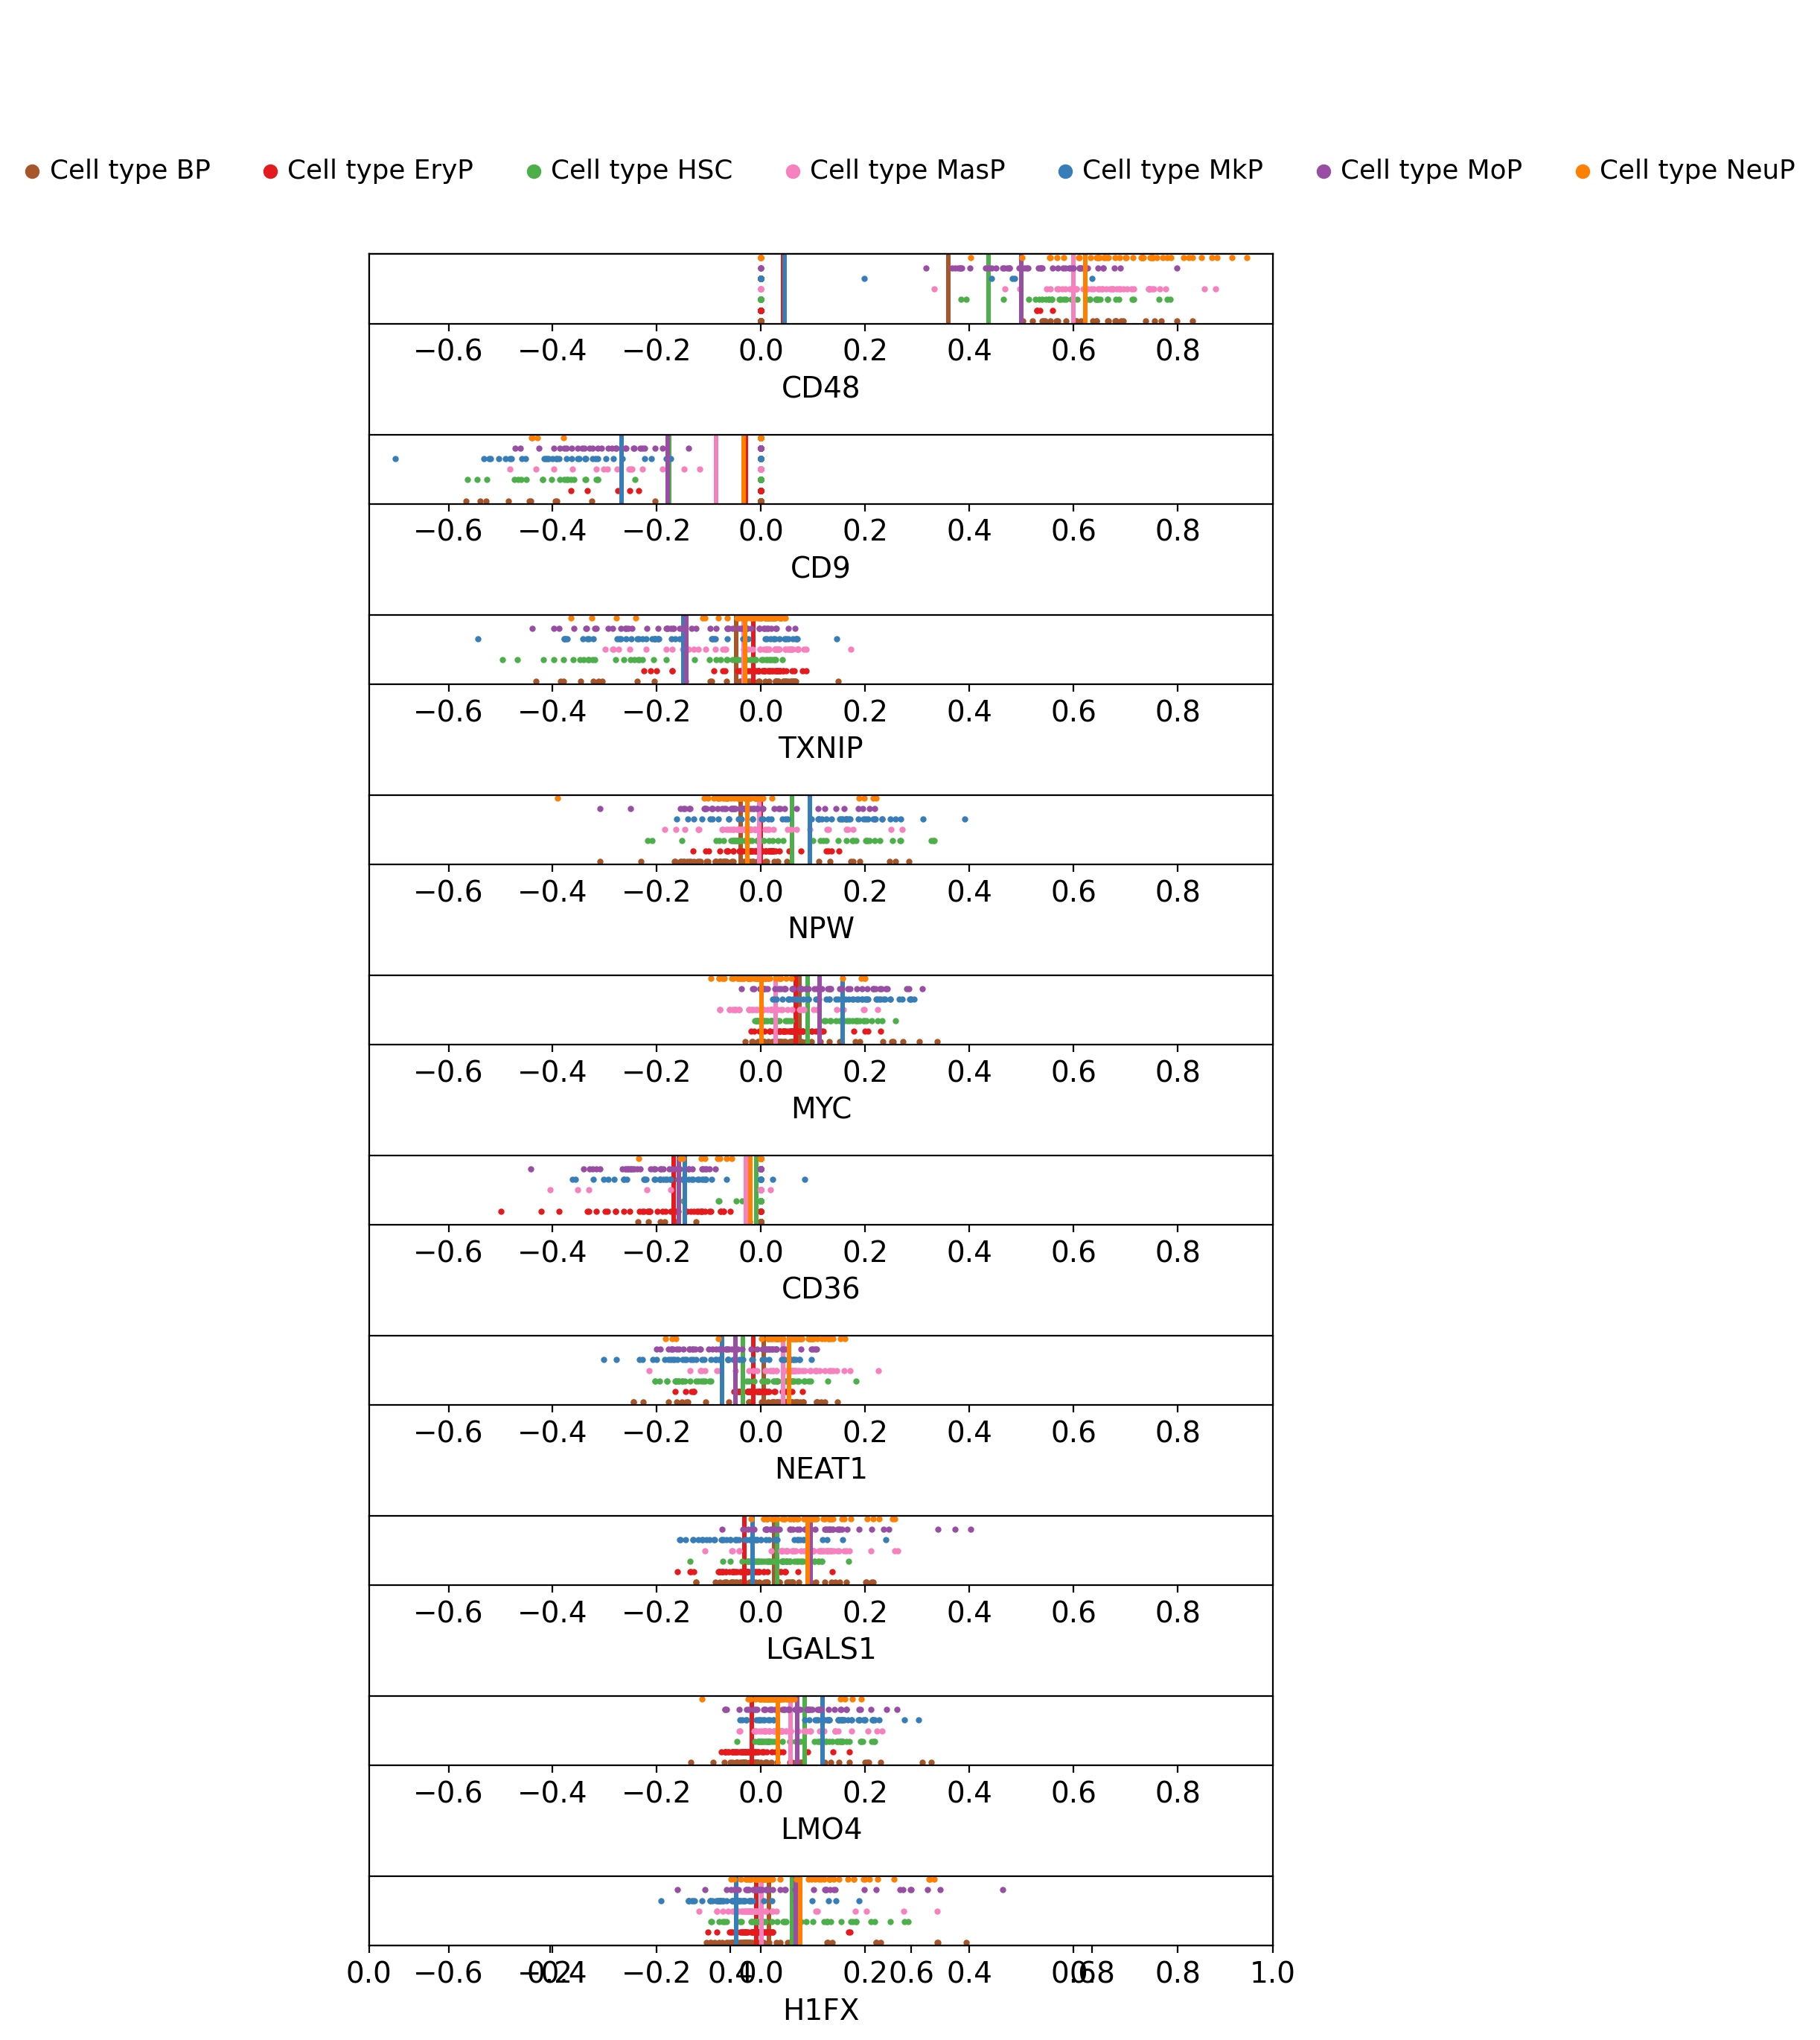

In [34]:
get_plot_per_cell_type(attr_all_22085_genes_17, ad.AnnData(X=xtest_all_genes, obs=xtest_17.obs, dtype=xtest_all_genes.dtypes), get_protein_idx('CD48'), all_attr=True)  #, save=True, filename='attr_17_50_samples_p', all_attr=True)

#### check why some genes ranked low

In [ ]:
# subset attr_all_22085_genes: any 19 plus the column we want
# force plot to show specific column
# see why 86 ranked low
idx = get_protein_idx('CD4')
top_9 = get_top_features(attr_all_22085_genes_17[idx], ad.AnnData(xtest_all_genes, dtype=xtest_all_genes.dtypes), 9)
subset = attr_all_22085_genes_17[idx][list(top_9)+get_gene_name('CD4')]
shap.initjs()
shap.summary_plot(np.array(subset), xtest_all_genes[subset.columns], feature_names=subset.columns)

In [ ]:
get_plot_per_cell_type([subset], ad.AnnData(X=xtest_all_genes[subset.columns], obs=xtest_17.obs, dtype=xtest_all_genes[subset.columns].dtypes), all_attr=False)

### plots for ensemble of model 16 and 17

In [26]:
# weighted sum of attribution datasets of model 16 and 17
attr_16_17 = {}

for key in range(140):
    # Add the dataframes element-wise if the key(==protein index) exists in both dictionaries
    if key in attr_all_22085_genes and key in attr_all_22085_genes_17:
        weighted_sum = 0.5 * attr_all_22085_genes[key] + 0.5 * attr_all_22085_genes_17[key]
        attr_16_17[key] = weighted_sum

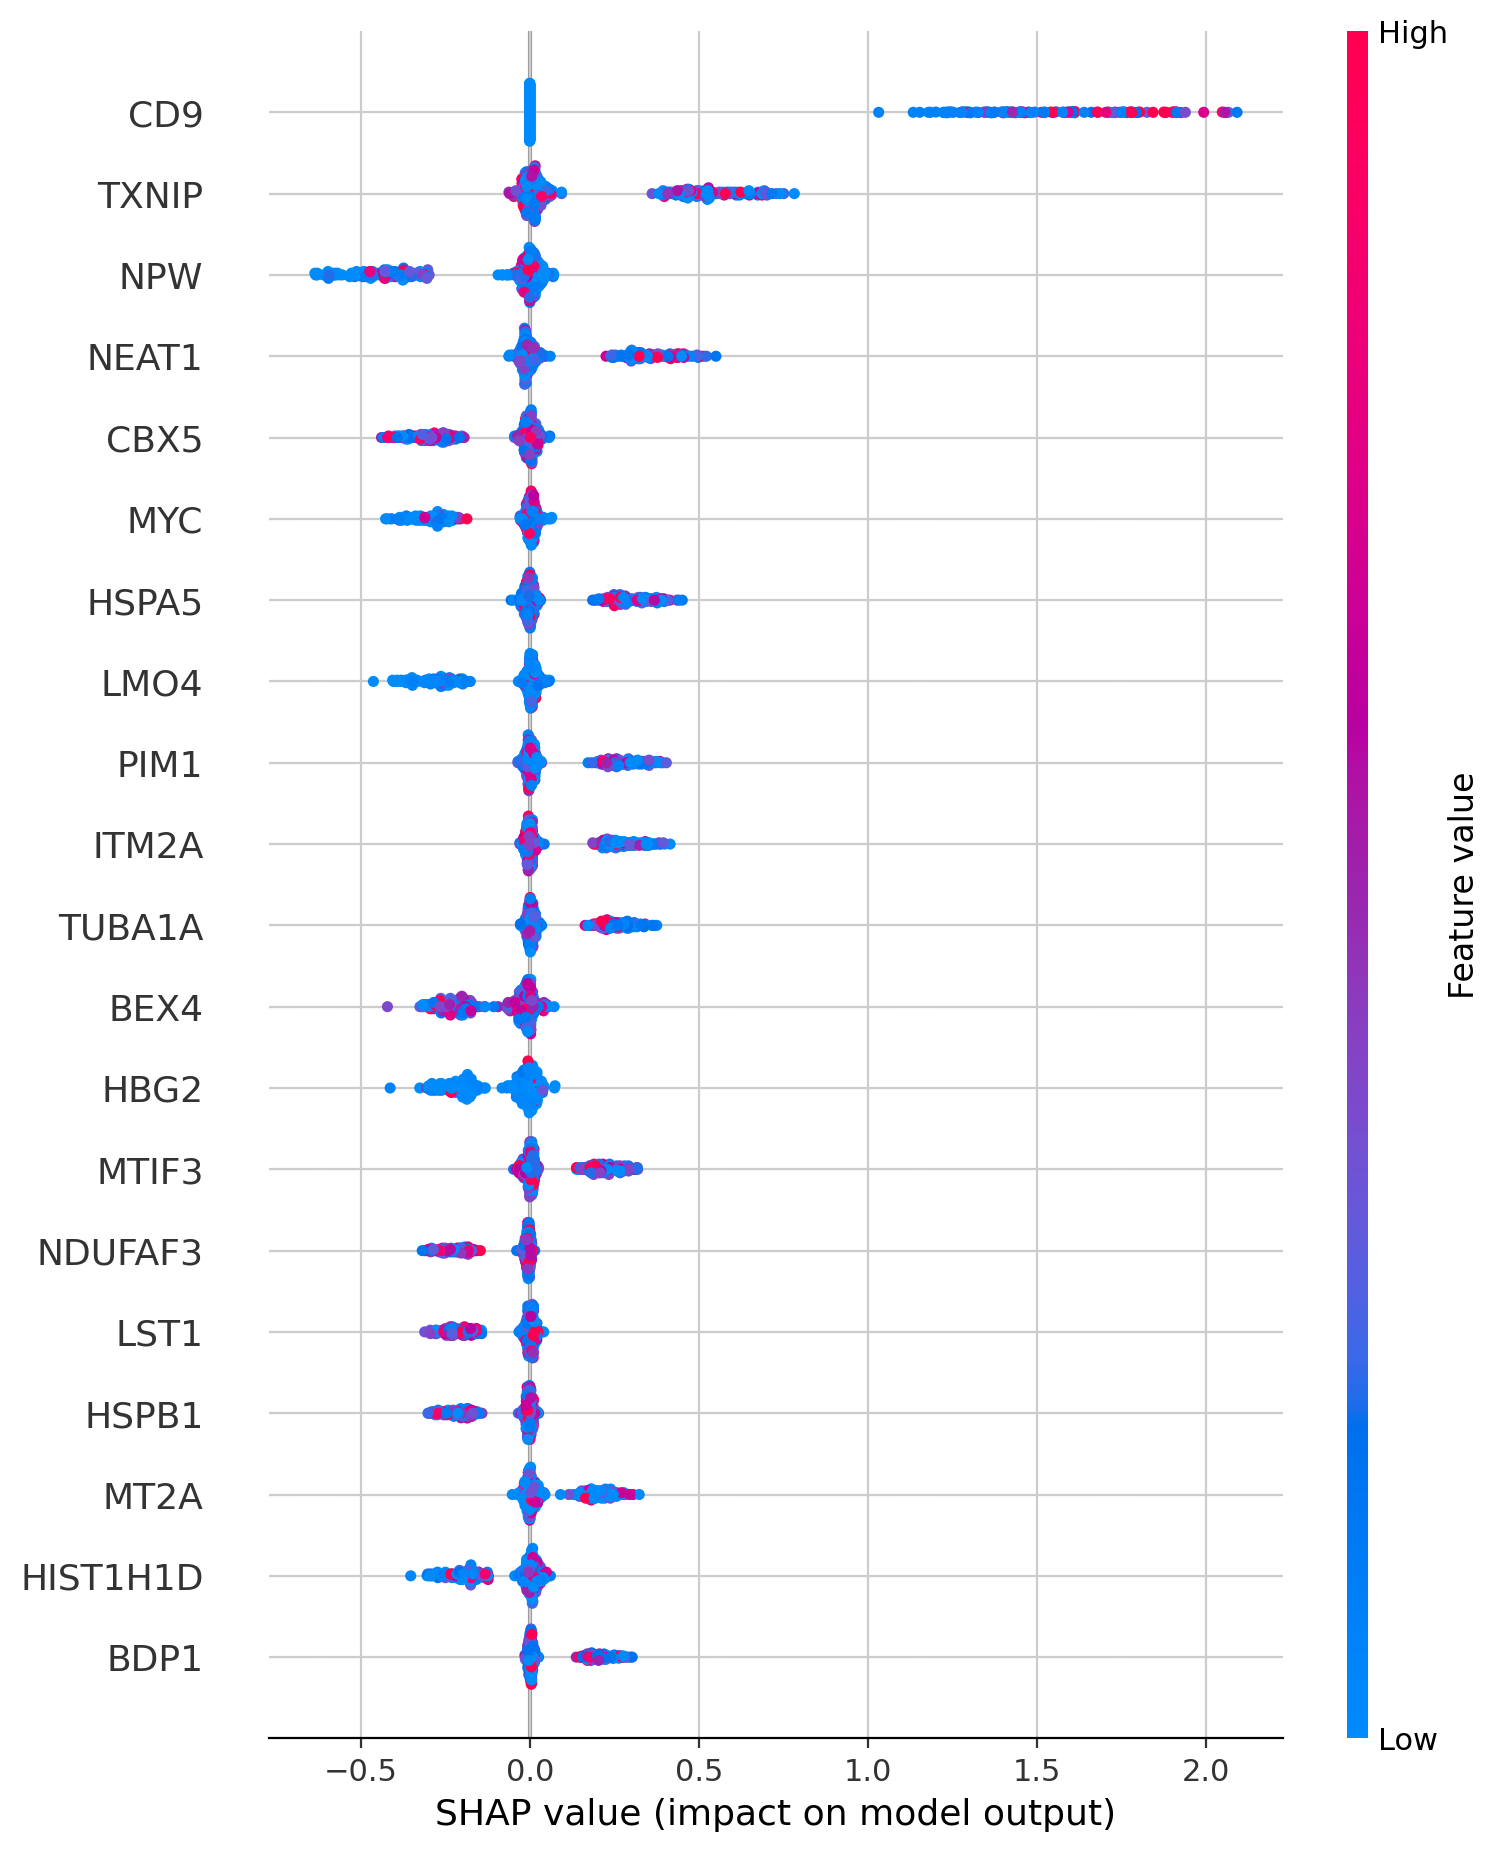

In [27]:
 attr_beeswarm(attr_16_17, xtest_all_genes, get_protein_idx('CD9'))

X converted to numpy array with dtype float64
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


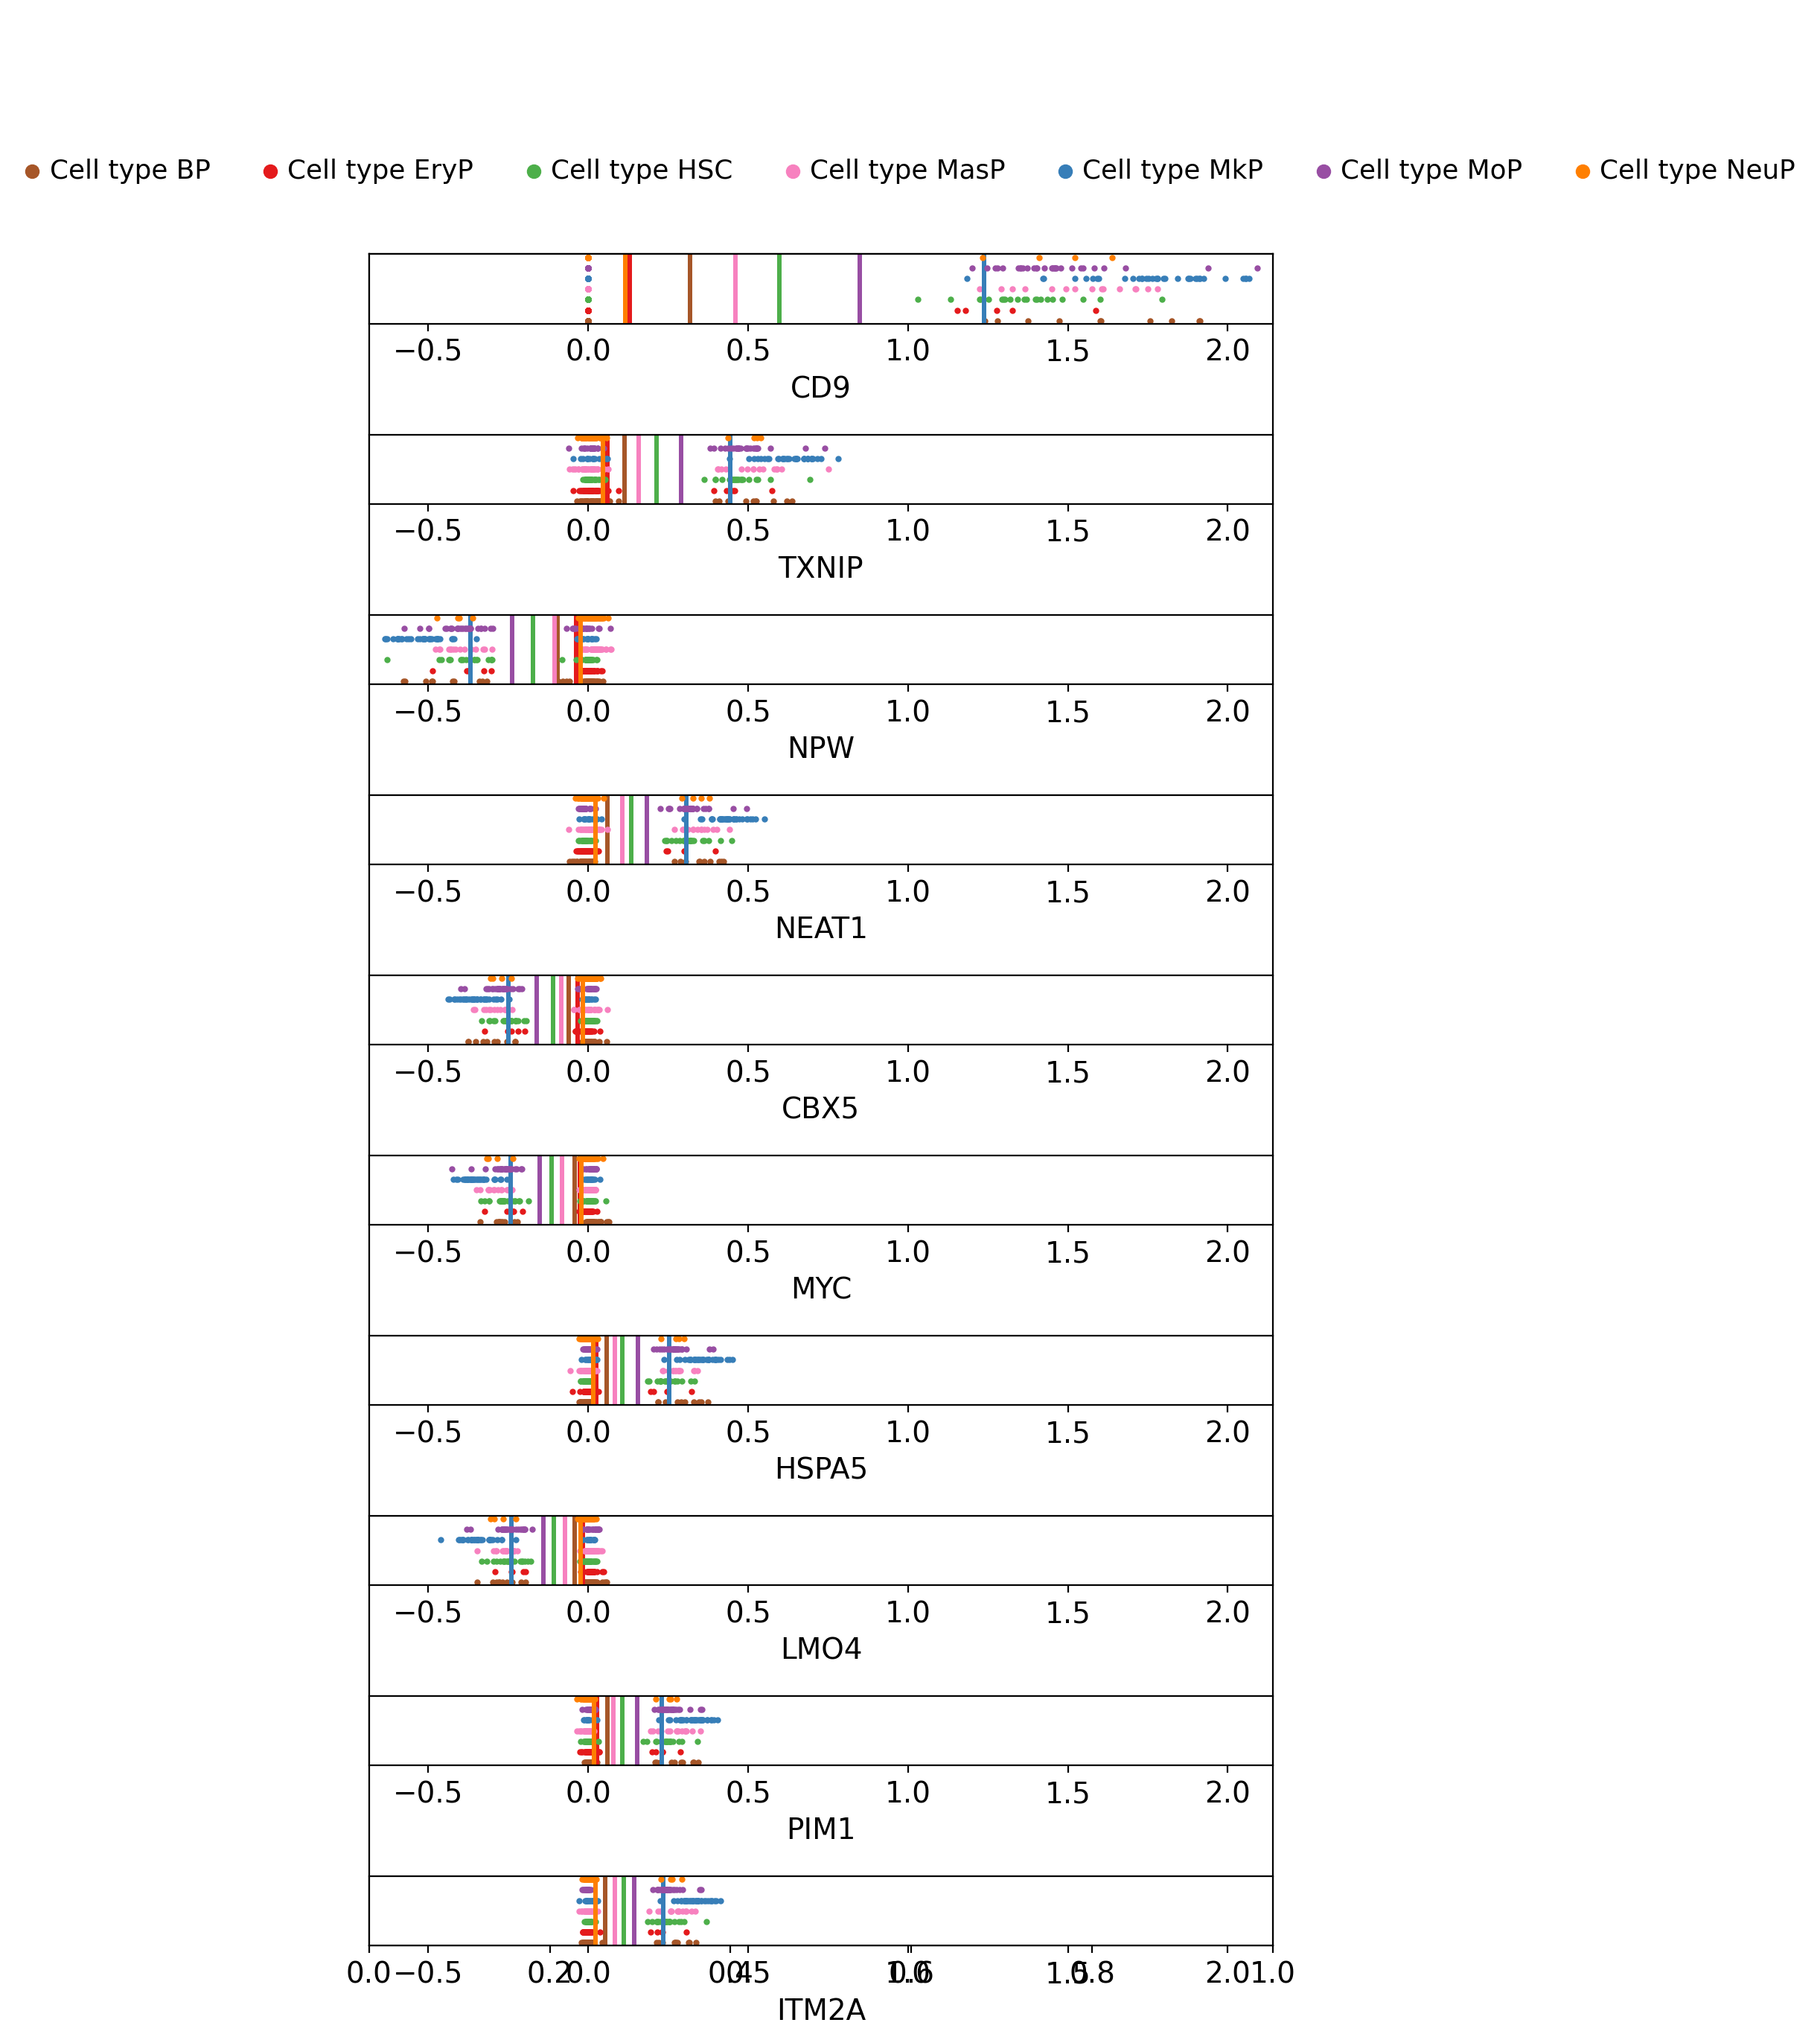

In [39]:
get_plot_per_cell_type(attr_16_17, ad.AnnData(X=xtest_all_genes, obs=xtest_17.obs, dtype=xtest_all_genes.dtypes), get_protein_idx('CD9'), all_attr=True)  #, save=True, filename='attr_17_50_samples_p', all_attr=True)

### get cell type plot for a specific gene and compare across models

X converted to numpy array with dtype float64
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


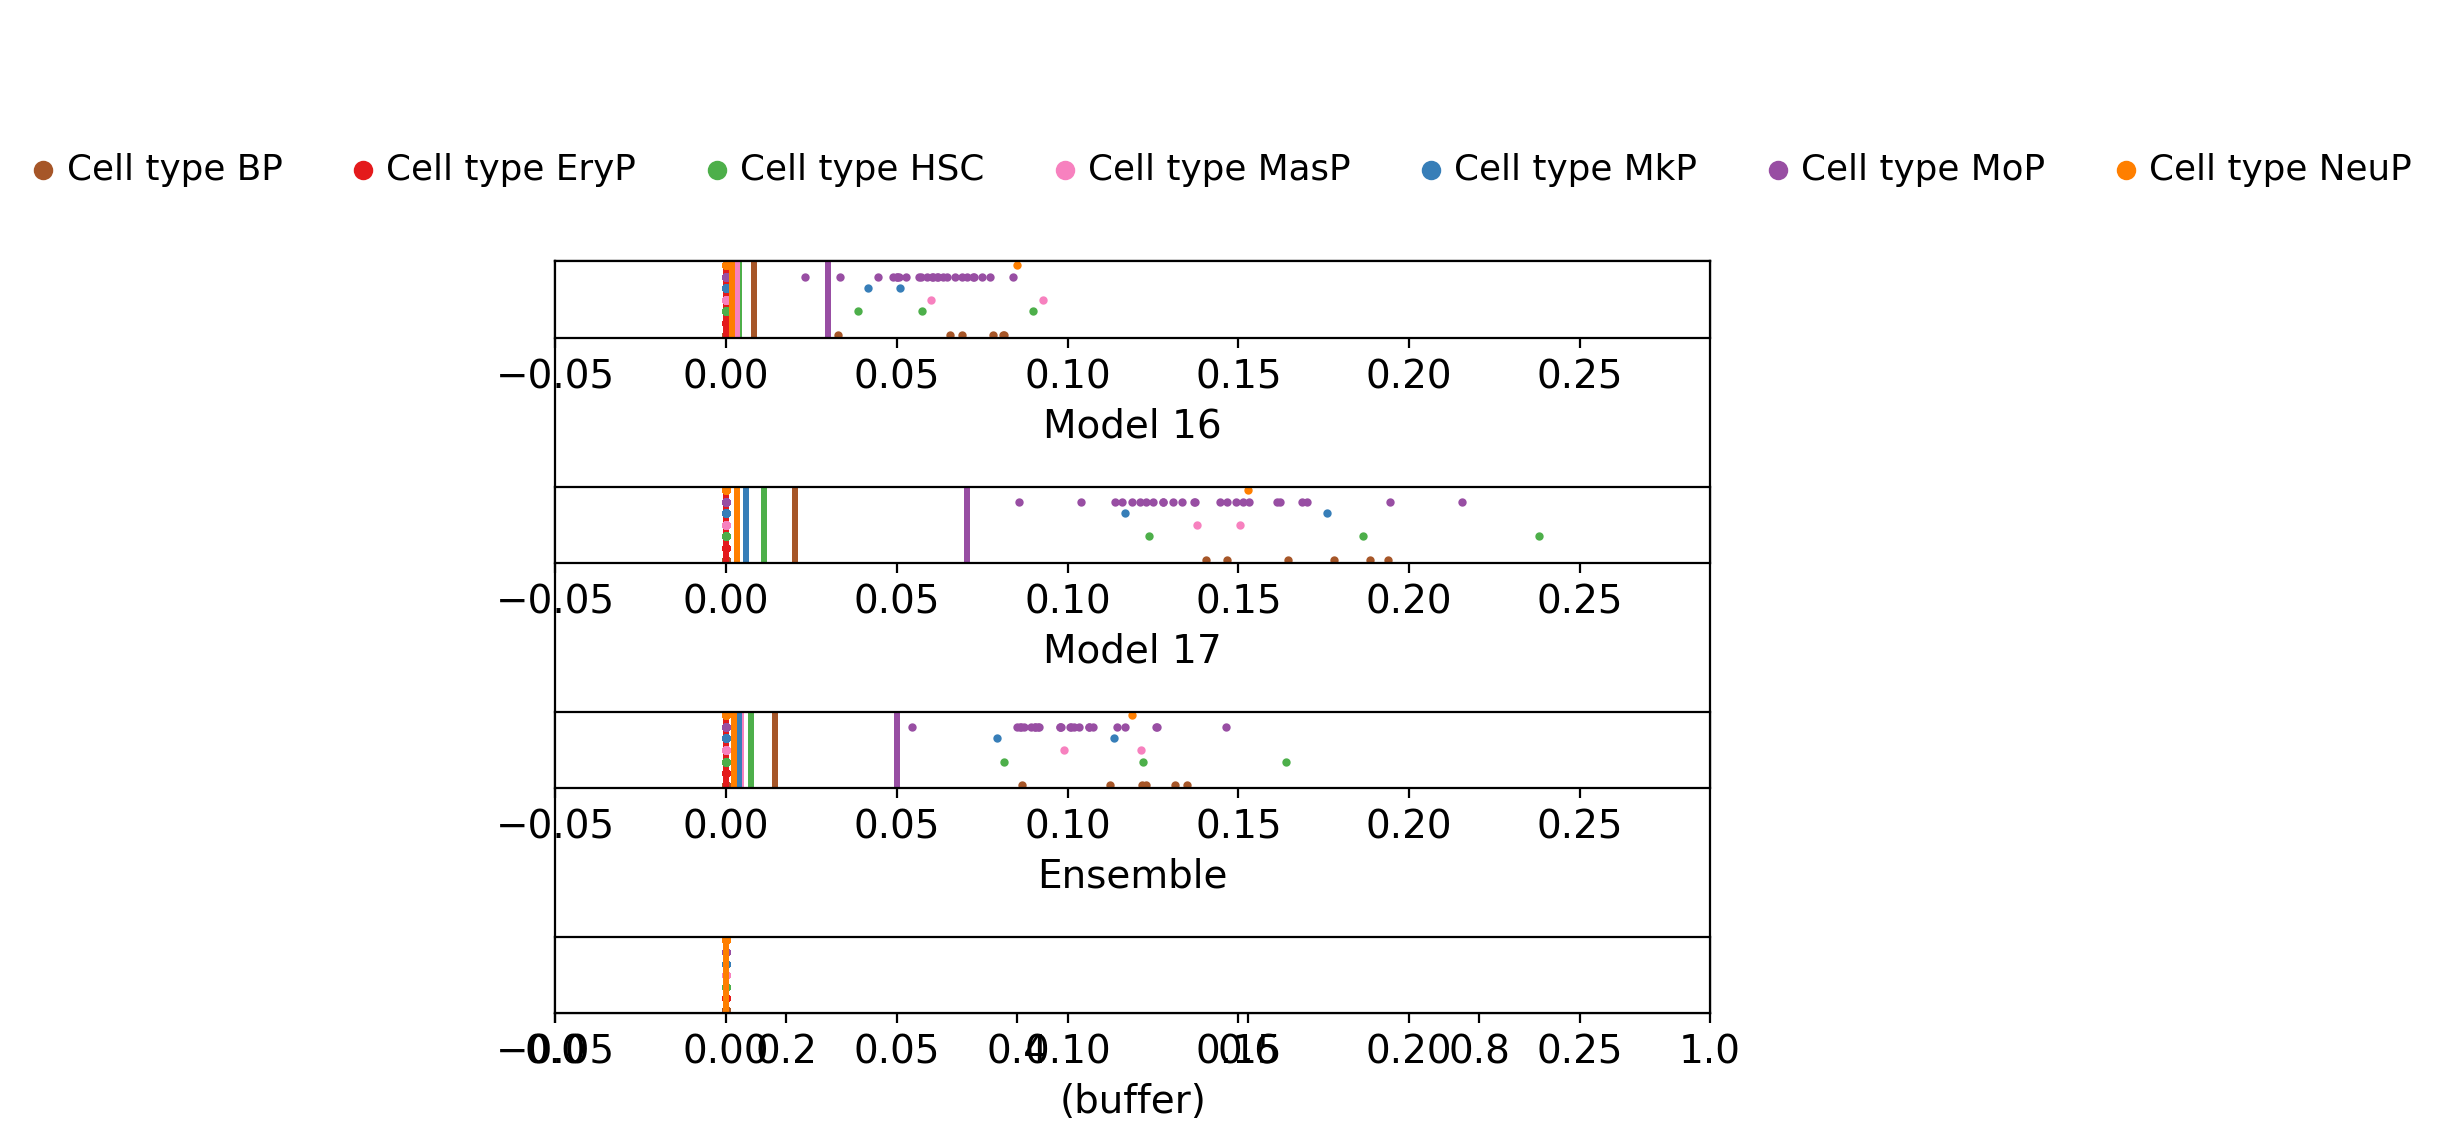

In [38]:
get_ct_plot_compare(attr_all_22085_genes, attr_all_22085_genes_17, attr_16_17, 
                    ad.AnnData(X=xtest_all_genes, obs=xtest.obs, dtype=xtest_all_genes.dtypes), 
                    get_protein_idx('CD86'), 'CD86')